# Assignment 3.3

Daphne Miedema

Diederik de Wit

# Image Caption Retrieval Model

### 1. Data preprocessing

We will use Microsoft COCO (Common Objects in Context) data set to train our "Image Caption Retrieval Model". This data set consists of pretrained 10-crop VGG19 features (Neural codes) and its corresponding text caption. 


In [0]:
from __future__ import print_function

import os
import sys
import numpy as np
import pandas as pd
from collections import OrderedDict

DATA_PATH = 'img_cap_coco' #(If Google colab)
#DATA_PATH = 'data' #(If local)
EMBEDDING_PATH = 'embeddings'
MODEL_PATH = 'models'

You will need to create above directories and locate data set provided in directory 'data'

In [3]:
!wget http://nlp.stanford.edu/data/glove.6B.zip
!wget https://storage.googleapis.com/trl_data/img_cap_coco.zip
!wget http://images.cocodataset.org/zips/val2014.zip

--2018-04-15 18:53:10--  http://nlp.stanford.edu/data/glove.6B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://nlp.stanford.edu/data/glove.6B.zip [following]
--2018-04-15 18:53:10--  https://nlp.stanford.edu/data/glove.6B.zip
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zip]
Saving to: ‘glove.6B.zip’

glove.6B.zip         68%[============>       ] 564.99M  18.0MB/s    eta 15s    

glove.6B.zip        100%[===================>] 822.24M  35.0MB/s    in 38s     

2018-04-15 18:53:49 (21.5 MB/s) - ‘glove.6B.zip’ saved [862182613/862182613]

--2018-04-15 18:53:50--  https://storage.googleapis.com/trl_data/img_cap_coco.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.141.128, 2607:f8b0:400c:c06::80
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.141.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 251061503 (239M) [application/zip]
Saving to: ‘img_cap_coco.zip’

img_cap_coco.zip    100%[===================>] 239.43M   158MB/s    in 1.5s    

2018-04-15 18:53:52 (158 MB/s) - ‘img_cap_coco.zip’ saved [251061503/251061503]

--2018-04-15 18:53:53--  http://images.cocodataset.org/zips/val2014.zip
Resolving images.cocodataset.org (images.cocodataset.org)... 74.125.141.128, 2607:f8b0:400c:c06::80
Connecting to images.cocodataset.org (images.cocodataset.org)|74.125.141.128|:80... connected.
HTTP request 

val2014.zip         100%[===================>]   6.19G   137MB/s    in 44s     

2018-04-15 18:54:37 (145 MB/s) - ‘val2014.zip’ saved [6645013297/6645013297]



In [4]:
!mkdir glove6B
!mv glove.6B.zip glove6B/

!unzip glove6B/glove.6B;
!unzip img_cap_coco;
!unzip val2014;

!mv glove.6B.100d.txt glove6B/
!mv glove.6B.50d.txt glove6B/
!mv glove.6B.200d.txt glove6B/
!mv glove.6B.300d.txt glove6B/

#rm -r foldername
#rm filename
#mv oldfoldername newfoldername

Archive:  glove6B/glove.6B.zip
  inflating: glove.6B.50d.txt        
  inflating: glove.6B.100d.txt       
  inflating: glove.6B.200d.txt       
  inflating: glove.6B.300d.txt       
Archive:  img_cap_coco.zip
   creating: img_cap_coco/
  inflating: img_cap_coco/captions_val2014.json  
  inflating: img_cap_coco/instances_val2014.json  
  inflating: img_cap_coco/test_data.npy  
  inflating: img_cap_coco/train_data.npy  
  inflating: img_cap_coco/val_data.npy  
Archive:  val2014.zip
   creating: val2014/
 extracting: val2014/COCO_val2014_000000324670.jpg  
 extracting: val2014/COCO_val2014_000000464263.jpg  
 extracting: val2014/COCO_val2014_000000526418.jpg  
 extracting: val2014/COCO_val2014_000000230593.jpg  
 extracting: val2014/COCO_val2014_000000186147.jpg  
 extracting: val2014/COCO_val2014_000000037149.jpg  
 extracting: val2014/COCO_val2014_000000284743.jpg  
 extracting: val2014/COCO_val2014_000000550691.jpg  
 extracting: val2014/COCO_val2014_000000515126.jpg  
 extracting: va


 extracting: val2014/COCO_val2014_000000235006.jpg  
 extracting: val2014/COCO_val2014_000000497006.jpg  
 extracting: val2014/COCO_val2014_000000467675.jpg  
 extracting: val2014/COCO_val2014_000000181572.jpg  
 extracting: val2014/COCO_val2014_000000436636.jpg  
 extracting: val2014/COCO_val2014_000000228350.jpg  
 extracting: val2014/COCO_val2014_000000241355.jpg  
 extracting: val2014/COCO_val2014_000000539310.jpg  
 extracting: val2014/COCO_val2014_000000509786.jpg  
 extracting: val2014/COCO_val2014_000000421811.jpg  
 extracting: val2014/COCO_val2014_000000253576.jpg  
 extracting: val2014/COCO_val2014_000000435240.jpg  
 extracting: val2014/COCO_val2014_000000576222.jpg  
 extracting: val2014/COCO_val2014_000000280858.jpg  
 extracting: val2014/COCO_val2014_000000532043.jpg  
 extracting: val2014/COCO_val2014_000000432255.jpg  
 extracting: val2014/COCO_val2014_000000461722.jpg  
 extracting: val2014/COCO_val2014_000000293333.jpg  
 extracting: val2014/COCO_val2014_00000049998


 extracting: val2014/COCO_val2014_000000370935.jpg  
 extracting: val2014/COCO_val2014_000000357335.jpg  
 extracting: val2014/COCO_val2014_000000096354.jpg  
 extracting: val2014/COCO_val2014_000000334813.jpg  
 extracting: val2014/COCO_val2014_000000412658.jpg  
 extracting: val2014/COCO_val2014_000000306343.jpg  
 extracting: val2014/COCO_val2014_000000477466.jpg  
 extracting: val2014/COCO_val2014_000000408008.jpg  
 extracting: val2014/COCO_val2014_000000521877.jpg  
 extracting: val2014/COCO_val2014_000000094823.jpg  
 extracting: val2014/COCO_val2014_000000353136.jpg  
 extracting: val2014/COCO_val2014_000000348829.jpg  
 extracting: val2014/COCO_val2014_000000219393.jpg  
 extracting: val2014/COCO_val2014_000000189939.jpg  
 extracting: val2014/COCO_val2014_000000575933.jpg  
 extracting: val2014/COCO_val2014_000000049450.jpg  
 extracting: val2014/COCO_val2014_000000102355.jpg  
 extracting: val2014/COCO_val2014_000000359965.jpg  
 extracting: val2014/COCO_val2014_00000039400


 extracting: val2014/COCO_val2014_000000426611.jpg  
 extracting: val2014/COCO_val2014_000000167792.jpg  
 extracting: val2014/COCO_val2014_000000030267.jpg  
 extracting: val2014/COCO_val2014_000000241373.jpg  
 extracting: val2014/COCO_val2014_000000573196.jpg  
 extracting: val2014/COCO_val2014_000000325078.jpg  
 extracting: val2014/COCO_val2014_000000013379.jpg  
 extracting: val2014/COCO_val2014_000000163057.jpg  
 extracting: val2014/COCO_val2014_000000506311.jpg  
 extracting: val2014/COCO_val2014_000000556966.jpg  
 extracting: val2014/COCO_val2014_000000443583.jpg  
 extracting: val2014/COCO_val2014_000000565941.jpg  
 extracting: val2014/COCO_val2014_000000036990.jpg  
 extracting: val2014/COCO_val2014_000000251716.jpg  
 extracting: val2014/COCO_val2014_000000572303.jpg  
 extracting: val2014/COCO_val2014_000000172201.jpg  
 extracting: val2014/COCO_val2014_000000287320.jpg  
 extracting: val2014/COCO_val2014_000000218811.jpg  
 extracting: val2014/COCO_val2014_00000001093

 extracting: val2014/COCO_val2014_000000082846.jpg  
 extracting: val2014/COCO_val2014_000000250001.jpg  
 extracting: val2014/COCO_val2014_000000268943.jpg  
 extracting: val2014/COCO_val2014_000000159030.jpg  
 extracting: val2014/COCO_val2014_000000461774.jpg  
 extracting: val2014/COCO_val2014_000000489739.jpg  
 extracting: val2014/COCO_val2014_000000199849.jpg  
 extracting: val2014/COCO_val2014_000000041397.jpg  
 extracting: val2014/COCO_val2014_000000029906.jpg  
 extracting: val2014/COCO_val2014_000000230993.jpg  
 extracting: val2014/COCO_val2014_000000125590.jpg  
 extracting: val2014/COCO_val2014_000000167452.jpg  
 extracting: val2014/COCO_val2014_000000499646.jpg  
 extracting: val2014/COCO_val2014_000000374982.jpg  
 extracting: val2014/COCO_val2014_000000521849.jpg  
 extracting: val2014/COCO_val2014_000000143247.jpg  
 extracting: val2014/COCO_val2014_000000032549.jpg  
 extracting: val2014/COCO_val2014_000000422740.jpg  
 extracting: val2014/COCO_val2014_000000276434


 extracting: val2014/COCO_val2014_000000199158.jpg  
 extracting: val2014/COCO_val2014_000000042383.jpg  
 extracting: val2014/COCO_val2014_000000235751.jpg  
 extracting: val2014/COCO_val2014_000000202653.jpg  
 extracting: val2014/COCO_val2014_000000442306.jpg  
 extracting: val2014/COCO_val2014_000000230610.jpg  
 extracting: val2014/COCO_val2014_000000162703.jpg  
 extracting: val2014/COCO_val2014_000000505754.jpg  
 extracting: val2014/COCO_val2014_000000212226.jpg  
 extracting: val2014/COCO_val2014_000000164475.jpg  
 extracting: val2014/COCO_val2014_000000009448.jpg  
 extracting: val2014/COCO_val2014_000000434089.jpg  
 extracting: val2014/COCO_val2014_000000374628.jpg  
 extracting: val2014/COCO_val2014_000000478736.jpg  
 extracting: val2014/COCO_val2014_000000575978.jpg  
 extracting: val2014/COCO_val2014_000000532773.jpg  
 extracting: val2014/COCO_val2014_000000322791.jpg  
 extracting: val2014/COCO_val2014_000000277172.jpg  
 extracting: val2014/COCO_val2014_00000048047


 extracting: val2014/COCO_val2014_000000090659.jpg  
 extracting: val2014/COCO_val2014_000000410589.jpg  
 extracting: val2014/COCO_val2014_000000024734.jpg  
 extracting: val2014/COCO_val2014_000000058869.jpg  
 extracting: val2014/COCO_val2014_000000152388.jpg  
 extracting: val2014/COCO_val2014_000000523137.jpg  
 extracting: val2014/COCO_val2014_000000476709.jpg  
 extracting: val2014/COCO_val2014_000000080153.jpg  
 extracting: val2014/COCO_val2014_000000530494.jpg  
 extracting: val2014/COCO_val2014_000000217269.jpg  
 extracting: val2014/COCO_val2014_000000038083.jpg  
 extracting: val2014/COCO_val2014_000000347172.jpg  
 extracting: val2014/COCO_val2014_000000254732.jpg  
 extracting: val2014/COCO_val2014_000000016360.jpg  
 extracting: val2014/COCO_val2014_000000402027.jpg  
 extracting: val2014/COCO_val2014_000000099794.jpg  
 extracting: val2014/COCO_val2014_000000306536.jpg  
 extracting: val2014/COCO_val2014_000000507782.jpg  
 extracting: val2014/COCO_val2014_00000017621


 extracting: val2014/COCO_val2014_000000269926.jpg  
 extracting: val2014/COCO_val2014_000000438253.jpg  
 extracting: val2014/COCO_val2014_000000439982.jpg  
 extracting: val2014/COCO_val2014_000000360564.jpg  
 extracting: val2014/COCO_val2014_000000348701.jpg  
 extracting: val2014/COCO_val2014_000000184773.jpg  
 extracting: val2014/COCO_val2014_000000465718.jpg  
 extracting: val2014/COCO_val2014_000000570101.jpg  
 extracting: val2014/COCO_val2014_000000394611.jpg  
 extracting: val2014/COCO_val2014_000000412873.jpg  
 extracting: val2014/COCO_val2014_000000280370.jpg  
 extracting: val2014/COCO_val2014_000000133969.jpg  
 extracting: val2014/COCO_val2014_000000122987.jpg  
 extracting: val2014/COCO_val2014_000000535403.jpg  
 extracting: val2014/COCO_val2014_000000367680.jpg  
 extracting: val2014/COCO_val2014_000000102159.jpg  
 extracting: val2014/COCO_val2014_000000087864.jpg  
 extracting: val2014/COCO_val2014_000000512223.jpg  
 extracting: val2014/COCO_val2014_00000031708

 extracting: val2014/COCO_val2014_000000080690.jpg  
 extracting: val2014/COCO_val2014_000000417857.jpg  
 extracting: val2014/COCO_val2014_000000032682.jpg  
 extracting: val2014/COCO_val2014_000000442929.jpg  
 extracting: val2014/COCO_val2014_000000092738.jpg  
 extracting: val2014/COCO_val2014_000000028826.jpg  
 extracting: val2014/COCO_val2014_000000185904.jpg  
 extracting: val2014/COCO_val2014_000000428975.jpg  
 extracting: val2014/COCO_val2014_000000428562.jpg  
 extracting: val2014/COCO_val2014_000000246053.jpg  
 extracting: val2014/COCO_val2014_000000419503.jpg  
 extracting: val2014/COCO_val2014_000000001369.jpg  
 extracting: val2014/COCO_val2014_000000528956.jpg  
 extracting: val2014/COCO_val2014_000000023821.jpg  
 extracting: val2014/COCO_val2014_000000511690.jpg  
 extracting: val2014/COCO_val2014_000000339965.jpg  
 extracting: val2014/COCO_val2014_000000041438.jpg  
 extracting: val2014/COCO_val2014_000000168580.jpg  
 extracting: val2014/COCO_val2014_000000118108


 extracting: val2014/COCO_val2014_000000098284.jpg  
 extracting: val2014/COCO_val2014_000000021551.jpg  
 extracting: val2014/COCO_val2014_000000156572.jpg  
 extracting: val2014/COCO_val2014_000000087581.jpg  
 extracting: val2014/COCO_val2014_000000132987.jpg  
 extracting: val2014/COCO_val2014_000000003335.jpg  
 extracting: val2014/COCO_val2014_000000509822.jpg  
 extracting: val2014/COCO_val2014_000000531111.jpg  
 extracting: val2014/COCO_val2014_000000156935.jpg  
 extracting: val2014/COCO_val2014_000000491921.jpg  
 extracting: val2014/COCO_val2014_000000419723.jpg  
 extracting: val2014/COCO_val2014_000000556932.jpg  
 extracting: val2014/COCO_val2014_000000456192.jpg  
 extracting: val2014/COCO_val2014_000000452623.jpg  
 extracting: val2014/COCO_val2014_000000047055.jpg  
 extracting: val2014/COCO_val2014_000000061960.jpg  
 extracting: val2014/COCO_val2014_000000487688.jpg  
 extracting: val2014/COCO_val2014_000000028957.jpg  
 extracting: val2014/COCO_val2014_00000033474


 extracting: val2014/COCO_val2014_000000262360.jpg  
 extracting: val2014/COCO_val2014_000000138730.jpg  
 extracting: val2014/COCO_val2014_000000488198.jpg  
 extracting: val2014/COCO_val2014_000000300994.jpg  
 extracting: val2014/COCO_val2014_000000428168.jpg  
 extracting: val2014/COCO_val2014_000000280271.jpg  
 extracting: val2014/COCO_val2014_000000052949.jpg  
 extracting: val2014/COCO_val2014_000000480664.jpg  
 extracting: val2014/COCO_val2014_000000543676.jpg  
 extracting: val2014/COCO_val2014_000000400728.jpg  
 extracting: val2014/COCO_val2014_000000196342.jpg  
 extracting: val2014/COCO_val2014_000000568154.jpg  
 extracting: val2014/COCO_val2014_000000410328.jpg  
 extracting: val2014/COCO_val2014_000000328018.jpg  
 extracting: val2014/COCO_val2014_000000492284.jpg  
 extracting: val2014/COCO_val2014_000000361964.jpg  
 extracting: val2014/COCO_val2014_000000309573.jpg  
 extracting: val2014/COCO_val2014_000000462629.jpg  
 extracting: val2014/COCO_val2014_00000013185


 extracting: val2014/COCO_val2014_000000018350.jpg  
 extracting: val2014/COCO_val2014_000000085881.jpg  
 extracting: val2014/COCO_val2014_000000208549.jpg  
 extracting: val2014/COCO_val2014_000000572462.jpg  
 extracting: val2014/COCO_val2014_000000096440.jpg  
 extracting: val2014/COCO_val2014_000000369470.jpg  
 extracting: val2014/COCO_val2014_000000233834.jpg  
 extracting: val2014/COCO_val2014_000000433993.jpg  
 extracting: val2014/COCO_val2014_000000563870.jpg  
 extracting: val2014/COCO_val2014_000000116825.jpg  
 extracting: val2014/COCO_val2014_000000292171.jpg  
 extracting: val2014/COCO_val2014_000000331268.jpg  
 extracting: val2014/COCO_val2014_000000541053.jpg  
 extracting: val2014/COCO_val2014_000000153083.jpg  
 extracting: val2014/COCO_val2014_000000243090.jpg  
 extracting: val2014/COCO_val2014_000000076768.jpg  
 extracting: val2014/COCO_val2014_000000475923.jpg  
 extracting: val2014/COCO_val2014_000000385036.jpg  
 extracting: val2014/COCO_val2014_00000000666


 extracting: val2014/COCO_val2014_000000202445.jpg  
 extracting: val2014/COCO_val2014_000000494887.jpg  
 extracting: val2014/COCO_val2014_000000448278.jpg  
 extracting: val2014/COCO_val2014_000000016249.jpg  
 extracting: val2014/COCO_val2014_000000257084.jpg  
 extracting: val2014/COCO_val2014_000000554727.jpg  
 extracting: val2014/COCO_val2014_000000432397.jpg  
 extracting: val2014/COCO_val2014_000000576052.jpg  
 extracting: val2014/COCO_val2014_000000418346.jpg  
 extracting: val2014/COCO_val2014_000000511241.jpg  
 extracting: val2014/COCO_val2014_000000360611.jpg  
 extracting: val2014/COCO_val2014_000000063950.jpg  
 extracting: val2014/COCO_val2014_000000013031.jpg  
 extracting: val2014/COCO_val2014_000000150558.jpg  
 extracting: val2014/COCO_val2014_000000205239.jpg  
 extracting: val2014/COCO_val2014_000000420878.jpg  
 extracting: val2014/COCO_val2014_000000267694.jpg  
 extracting: val2014/COCO_val2014_000000236323.jpg  
 extracting: val2014/COCO_val2014_00000005741


 extracting: val2014/COCO_val2014_000000238389.jpg  
 extracting: val2014/COCO_val2014_000000214106.jpg  
 extracting: val2014/COCO_val2014_000000465549.jpg  
 extracting: val2014/COCO_val2014_000000255633.jpg  
 extracting: val2014/COCO_val2014_000000575763.jpg  
 extracting: val2014/COCO_val2014_000000550666.jpg  
 extracting: val2014/COCO_val2014_000000267169.jpg  
 extracting: val2014/COCO_val2014_000000058910.jpg  
 extracting: val2014/COCO_val2014_000000260409.jpg  
 extracting: val2014/COCO_val2014_000000268052.jpg  
 extracting: val2014/COCO_val2014_000000034597.jpg  
 extracting: val2014/COCO_val2014_000000215627.jpg  
 extracting: val2014/COCO_val2014_000000042970.jpg  
 extracting: val2014/COCO_val2014_000000558633.jpg  
 extracting: val2014/COCO_val2014_000000138550.jpg  
 extracting: val2014/COCO_val2014_000000451511.jpg  
 extracting: val2014/COCO_val2014_000000187979.jpg  
 extracting: val2014/COCO_val2014_000000067532.jpg  
 extracting: val2014/COCO_val2014_00000001289


 extracting: val2014/COCO_val2014_000000334015.jpg  
 extracting: val2014/COCO_val2014_000000027789.jpg  
 extracting: val2014/COCO_val2014_000000458168.jpg  
 extracting: val2014/COCO_val2014_000000355785.jpg  
 extracting: val2014/COCO_val2014_000000146489.jpg  
 extracting: val2014/COCO_val2014_000000338591.jpg  
 extracting: val2014/COCO_val2014_000000487428.jpg  
 extracting: val2014/COCO_val2014_000000232679.jpg  
 extracting: val2014/COCO_val2014_000000169736.jpg  
 extracting: val2014/COCO_val2014_000000435937.jpg  
 extracting: val2014/COCO_val2014_000000330348.jpg  
 extracting: val2014/COCO_val2014_000000464092.jpg  
 extracting: val2014/COCO_val2014_000000077837.jpg  
 extracting: val2014/COCO_val2014_000000288391.jpg  
 extracting: val2014/COCO_val2014_000000400887.jpg  
 extracting: val2014/COCO_val2014_000000442143.jpg  
 extracting: val2014/COCO_val2014_000000298261.jpg  
 extracting: val2014/COCO_val2014_000000575915.jpg  
 extracting: val2014/COCO_val2014_00000007992


 extracting: val2014/COCO_val2014_000000032416.jpg  
 extracting: val2014/COCO_val2014_000000159609.jpg  
 extracting: val2014/COCO_val2014_000000160872.jpg  
 extracting: val2014/COCO_val2014_000000297299.jpg  
 extracting: val2014/COCO_val2014_000000435081.jpg  
 extracting: val2014/COCO_val2014_000000362219.jpg  
 extracting: val2014/COCO_val2014_000000381639.jpg  
 extracting: val2014/COCO_val2014_000000495626.jpg  
 extracting: val2014/COCO_val2014_000000439180.jpg  
 extracting: val2014/COCO_val2014_000000145325.jpg  
 extracting: val2014/COCO_val2014_000000361341.jpg  
 extracting: val2014/COCO_val2014_000000237764.jpg  
 extracting: val2014/COCO_val2014_000000290026.jpg  
 extracting: val2014/COCO_val2014_000000209901.jpg  
 extracting: val2014/COCO_val2014_000000440706.jpg  
 extracting: val2014/COCO_val2014_000000301926.jpg  
 extracting: val2014/COCO_val2014_000000247782.jpg  
 extracting: val2014/COCO_val2014_000000110951.jpg  
 extracting: val2014/COCO_val2014_00000022022

 extracting: val2014/COCO_val2014_000000455741.jpg  
 extracting: val2014/COCO_val2014_000000148843.jpg  
 extracting: val2014/COCO_val2014_000000440724.jpg  
 extracting: val2014/COCO_val2014_000000419544.jpg  
 extracting: val2014/COCO_val2014_000000098497.jpg  
 extracting: val2014/COCO_val2014_000000416308.jpg  
 extracting: val2014/COCO_val2014_000000151826.jpg  
 extracting: val2014/COCO_val2014_000000057571.jpg  
 extracting: val2014/COCO_val2014_000000044061.jpg  
 extracting: val2014/COCO_val2014_000000119802.jpg  
 extracting: val2014/COCO_val2014_000000182683.jpg  
 extracting: val2014/COCO_val2014_000000013892.jpg  
 extracting: val2014/COCO_val2014_000000305423.jpg  
 extracting: val2014/COCO_val2014_000000119630.jpg  
 extracting: val2014/COCO_val2014_000000524889.jpg  
 extracting: val2014/COCO_val2014_000000056544.jpg  
 extracting: val2014/COCO_val2014_000000097800.jpg  
 extracting: val2014/COCO_val2014_000000414034.jpg  
 extracting: val2014/COCO_val2014_000000074492

 extracting: val2014/COCO_val2014_000000014567.jpg  
 extracting: val2014/COCO_val2014_000000482187.jpg  
 extracting: val2014/COCO_val2014_000000493613.jpg  
 extracting: val2014/COCO_val2014_000000258330.jpg  
 extracting: val2014/COCO_val2014_000000217153.jpg  
 extracting: val2014/COCO_val2014_000000378825.jpg  
 extracting: val2014/COCO_val2014_000000170436.jpg  
 extracting: val2014/COCO_val2014_000000006589.jpg  
 extracting: val2014/COCO_val2014_000000048917.jpg  
 extracting: val2014/COCO_val2014_000000119845.jpg  
 extracting: val2014/COCO_val2014_000000005569.jpg  
 extracting: val2014/COCO_val2014_000000400516.jpg  
 extracting: val2014/COCO_val2014_000000431967.jpg  
 extracting: val2014/COCO_val2014_000000014990.jpg  
 extracting: val2014/COCO_val2014_000000346865.jpg  
 extracting: val2014/COCO_val2014_000000329455.jpg  
 extracting: val2014/COCO_val2014_000000047588.jpg  
 extracting: val2014/COCO_val2014_000000004665.jpg  
 extracting: val2014/COCO_val2014_000000075216


 extracting: val2014/COCO_val2014_000000129135.jpg  
 extracting: val2014/COCO_val2014_000000423337.jpg  
 extracting: val2014/COCO_val2014_000000027440.jpg  
 extracting: val2014/COCO_val2014_000000214871.jpg  
 extracting: val2014/COCO_val2014_000000335326.jpg  
 extracting: val2014/COCO_val2014_000000310445.jpg  
 extracting: val2014/COCO_val2014_000000452793.jpg  
 extracting: val2014/COCO_val2014_000000074704.jpg  
 extracting: val2014/COCO_val2014_000000488571.jpg  
 extracting: val2014/COCO_val2014_000000099553.jpg  
 extracting: val2014/COCO_val2014_000000338191.jpg  
 extracting: val2014/COCO_val2014_000000298526.jpg  
 extracting: val2014/COCO_val2014_000000003134.jpg  
 extracting: val2014/COCO_val2014_000000213309.jpg  
 extracting: val2014/COCO_val2014_000000453330.jpg  
 extracting: val2014/COCO_val2014_000000524110.jpg  
 extracting: val2014/COCO_val2014_000000254983.jpg  
 extracting: val2014/COCO_val2014_000000574675.jpg  
 extracting: val2014/COCO_val2014_00000027160


 extracting: val2014/COCO_val2014_000000104585.jpg  
 extracting: val2014/COCO_val2014_000000522020.jpg  
 extracting: val2014/COCO_val2014_000000464149.jpg  
 extracting: val2014/COCO_val2014_000000290881.jpg  
 extracting: val2014/COCO_val2014_000000417044.jpg  
 extracting: val2014/COCO_val2014_000000037615.jpg  
 extracting: val2014/COCO_val2014_000000380868.jpg  
 extracting: val2014/COCO_val2014_000000084936.jpg  
 extracting: val2014/COCO_val2014_000000236904.jpg  
 extracting: val2014/COCO_val2014_000000522889.jpg  
 extracting: val2014/COCO_val2014_000000352582.jpg  
 extracting: val2014/COCO_val2014_000000328757.jpg  
 extracting: val2014/COCO_val2014_000000521634.jpg  
 extracting: val2014/COCO_val2014_000000078061.jpg  
 extracting: val2014/COCO_val2014_000000473821.jpg  
 extracting: val2014/COCO_val2014_000000546342.jpg  
 extracting: val2014/COCO_val2014_000000092131.jpg  
 extracting: val2014/COCO_val2014_000000365132.jpg  
 extracting: val2014/COCO_val2014_00000057581


 extracting: val2014/COCO_val2014_000000242095.jpg  
 extracting: val2014/COCO_val2014_000000440461.jpg  
 extracting: val2014/COCO_val2014_000000274629.jpg  
 extracting: val2014/COCO_val2014_000000552545.jpg  
 extracting: val2014/COCO_val2014_000000115870.jpg  
 extracting: val2014/COCO_val2014_000000388066.jpg  
 extracting: val2014/COCO_val2014_000000578347.jpg  
 extracting: val2014/COCO_val2014_000000185559.jpg  
 extracting: val2014/COCO_val2014_000000012115.jpg  
 extracting: val2014/COCO_val2014_000000251343.jpg  
 extracting: val2014/COCO_val2014_000000475389.jpg  
 extracting: val2014/COCO_val2014_000000548706.jpg  
 extracting: val2014/COCO_val2014_000000225693.jpg  
 extracting: val2014/COCO_val2014_000000308278.jpg  
 extracting: val2014/COCO_val2014_000000450182.jpg  
 extracting: val2014/COCO_val2014_000000212322.jpg  
 extracting: val2014/COCO_val2014_000000006005.jpg  
 extracting: val2014/COCO_val2014_000000518006.jpg  
 extracting: val2014/COCO_val2014_00000003765


 extracting: val2014/COCO_val2014_000000285120.jpg  
 extracting: val2014/COCO_val2014_000000332067.jpg  
 extracting: val2014/COCO_val2014_000000520437.jpg  
 extracting: val2014/COCO_val2014_000000336372.jpg  
 extracting: val2014/COCO_val2014_000000065267.jpg  
 extracting: val2014/COCO_val2014_000000057359.jpg  
 extracting: val2014/COCO_val2014_000000566414.jpg  
 extracting: val2014/COCO_val2014_000000022191.jpg  
 extracting: val2014/COCO_val2014_000000308531.jpg  
 extracting: val2014/COCO_val2014_000000010123.jpg  
 extracting: val2014/COCO_val2014_000000488166.jpg  
 extracting: val2014/COCO_val2014_000000454762.jpg  
 extracting: val2014/COCO_val2014_000000090062.jpg  
 extracting: val2014/COCO_val2014_000000320901.jpg  
 extracting: val2014/COCO_val2014_000000384981.jpg  
 extracting: val2014/COCO_val2014_000000492378.jpg  
 extracting: val2014/COCO_val2014_000000278627.jpg  
 extracting: val2014/COCO_val2014_000000301582.jpg  
 extracting: val2014/COCO_val2014_00000048757

 extracting: val2014/COCO_val2014_000000406873.jpg  
 extracting: val2014/COCO_val2014_000000296404.jpg  
 extracting: val2014/COCO_val2014_000000463699.jpg  
 extracting: val2014/COCO_val2014_000000403885.jpg  
 extracting: val2014/COCO_val2014_000000410195.jpg  
 extracting: val2014/COCO_val2014_000000343963.jpg  
 extracting: val2014/COCO_val2014_000000234938.jpg  
 extracting: val2014/COCO_val2014_000000024144.jpg  
 extracting: val2014/COCO_val2014_000000184606.jpg  
 extracting: val2014/COCO_val2014_000000168746.jpg  
 extracting: val2014/COCO_val2014_000000136820.jpg  
 extracting: val2014/COCO_val2014_000000222991.jpg  
 extracting: val2014/COCO_val2014_000000264330.jpg  
 extracting: val2014/COCO_val2014_000000269932.jpg  
 extracting: val2014/COCO_val2014_000000460289.jpg  
 extracting: val2014/COCO_val2014_000000441586.jpg  
 extracting: val2014/COCO_val2014_000000091921.jpg  
 extracting: val2014/COCO_val2014_000000213361.jpg  
 extracting: val2014/COCO_val2014_000000413339


 extracting: val2014/COCO_val2014_000000045550.jpg  
 extracting: val2014/COCO_val2014_000000018412.jpg  
 extracting: val2014/COCO_val2014_000000182984.jpg  
 extracting: val2014/COCO_val2014_000000111910.jpg  
 extracting: val2014/COCO_val2014_000000314880.jpg  
 extracting: val2014/COCO_val2014_000000276488.jpg  
 extracting: val2014/COCO_val2014_000000123069.jpg  
 extracting: val2014/COCO_val2014_000000035076.jpg  
 extracting: val2014/COCO_val2014_000000103460.jpg  
 extracting: val2014/COCO_val2014_000000272599.jpg  
 extracting: val2014/COCO_val2014_000000267251.jpg  
 extracting: val2014/COCO_val2014_000000418696.jpg  
 extracting: val2014/COCO_val2014_000000348793.jpg  
 extracting: val2014/COCO_val2014_000000412364.jpg  
 extracting: val2014/COCO_val2014_000000141910.jpg  
 extracting: val2014/COCO_val2014_000000411070.jpg  
 extracting: val2014/COCO_val2014_000000099416.jpg  
 extracting: val2014/COCO_val2014_000000461278.jpg  
 extracting: val2014/COCO_val2014_00000007207


 extracting: val2014/COCO_val2014_000000281766.jpg  
 extracting: val2014/COCO_val2014_000000524595.jpg  
 extracting: val2014/COCO_val2014_000000408288.jpg  
 extracting: val2014/COCO_val2014_000000094746.jpg  
 extracting: val2014/COCO_val2014_000000347666.jpg  
 extracting: val2014/COCO_val2014_000000555356.jpg  
 extracting: val2014/COCO_val2014_000000349489.jpg  
 extracting: val2014/COCO_val2014_000000477144.jpg  
 extracting: val2014/COCO_val2014_000000393569.jpg  
 extracting: val2014/COCO_val2014_000000419444.jpg  
 extracting: val2014/COCO_val2014_000000313593.jpg  
 extracting: val2014/COCO_val2014_000000328464.jpg  
 extracting: val2014/COCO_val2014_000000015597.jpg  
 extracting: val2014/COCO_val2014_000000510078.jpg  
 extracting: val2014/COCO_val2014_000000427464.jpg  
 extracting: val2014/COCO_val2014_000000310980.jpg  
 extracting: val2014/COCO_val2014_000000155546.jpg  
 extracting: val2014/COCO_val2014_000000392781.jpg  
 extracting: val2014/COCO_val2014_00000050393


 extracting: val2014/COCO_val2014_000000373574.jpg  
 extracting: val2014/COCO_val2014_000000403255.jpg  
 extracting: val2014/COCO_val2014_000000395550.jpg  
 extracting: val2014/COCO_val2014_000000485897.jpg  
 extracting: val2014/COCO_val2014_000000469961.jpg  
 extracting: val2014/COCO_val2014_000000326928.jpg  
 extracting: val2014/COCO_val2014_000000138806.jpg  
 extracting: val2014/COCO_val2014_000000511111.jpg  
 extracting: val2014/COCO_val2014_000000331113.jpg  
 extracting: val2014/COCO_val2014_000000023126.jpg  
 extracting: val2014/COCO_val2014_000000398505.jpg  
 extracting: val2014/COCO_val2014_000000265816.jpg  
 extracting: val2014/COCO_val2014_000000577912.jpg  
 extracting: val2014/COCO_val2014_000000166642.jpg  
 extracting: val2014/COCO_val2014_000000565031.jpg  
 extracting: val2014/COCO_val2014_000000151130.jpg  
 extracting: val2014/COCO_val2014_000000501142.jpg  
 extracting: val2014/COCO_val2014_000000371829.jpg  
 extracting: val2014/COCO_val2014_00000037916


 extracting: val2014/COCO_val2014_000000072275.jpg  
 extracting: val2014/COCO_val2014_000000142592.jpg  
 extracting: val2014/COCO_val2014_000000317939.jpg  
 extracting: val2014/COCO_val2014_000000183155.jpg  
 extracting: val2014/COCO_val2014_000000283318.jpg  
 extracting: val2014/COCO_val2014_000000345376.jpg  
 extracting: val2014/COCO_val2014_000000033871.jpg  
 extracting: val2014/COCO_val2014_000000113235.jpg  
 extracting: val2014/COCO_val2014_000000027519.jpg  
 extracting: val2014/COCO_val2014_000000392753.jpg  
 extracting: val2014/COCO_val2014_000000543347.jpg  
 extracting: val2014/COCO_val2014_000000173166.jpg  
 extracting: val2014/COCO_val2014_000000416385.jpg  
 extracting: val2014/COCO_val2014_000000346138.jpg  
 extracting: val2014/COCO_val2014_000000132982.jpg  
 extracting: val2014/COCO_val2014_000000526728.jpg  
 extracting: val2014/COCO_val2014_000000306383.jpg  
 extracting: val2014/COCO_val2014_000000053838.jpg  
 extracting: val2014/COCO_val2014_00000049432

 extracting: val2014/COCO_val2014_000000194471.jpg  
 extracting: val2014/COCO_val2014_000000230838.jpg  
 extracting: val2014/COCO_val2014_000000084674.jpg  
 extracting: val2014/COCO_val2014_000000487299.jpg  
 extracting: val2014/COCO_val2014_000000458109.jpg  
 extracting: val2014/COCO_val2014_000000014781.jpg  
 extracting: val2014/COCO_val2014_000000190734.jpg  
 extracting: val2014/COCO_val2014_000000075563.jpg  
 extracting: val2014/COCO_val2014_000000575822.jpg  
 extracting: val2014/COCO_val2014_000000030793.jpg  
 extracting: val2014/COCO_val2014_000000270066.jpg  
 extracting: val2014/COCO_val2014_000000314396.jpg  
 extracting: val2014/COCO_val2014_000000038031.jpg  
 extracting: val2014/COCO_val2014_000000561958.jpg  
 extracting: val2014/COCO_val2014_000000163628.jpg  
 extracting: val2014/COCO_val2014_000000412963.jpg  
 extracting: val2014/COCO_val2014_000000296657.jpg  
 extracting: val2014/COCO_val2014_000000049236.jpg  
 extracting: val2014/COCO_val2014_000000337083


 extracting: val2014/COCO_val2014_000000571584.jpg  
 extracting: val2014/COCO_val2014_000000212533.jpg  
 extracting: val2014/COCO_val2014_000000562356.jpg  
 extracting: val2014/COCO_val2014_000000565761.jpg  
 extracting: val2014/COCO_val2014_000000566687.jpg  
 extracting: val2014/COCO_val2014_000000451944.jpg  
 extracting: val2014/COCO_val2014_000000392998.jpg  
 extracting: val2014/COCO_val2014_000000302160.jpg  
 extracting: val2014/COCO_val2014_000000131804.jpg  
 extracting: val2014/COCO_val2014_000000312559.jpg  
 extracting: val2014/COCO_val2014_000000302038.jpg  
 extracting: val2014/COCO_val2014_000000081251.jpg  
 extracting: val2014/COCO_val2014_000000291490.jpg  
 extracting: val2014/COCO_val2014_000000574250.jpg  
 extracting: val2014/COCO_val2014_000000354657.jpg  
 extracting: val2014/COCO_val2014_000000566012.jpg  
 extracting: val2014/COCO_val2014_000000504516.jpg  
 extracting: val2014/COCO_val2014_000000264568.jpg  
 extracting: val2014/COCO_val2014_00000044325


 extracting: val2014/COCO_val2014_000000514200.jpg  
 extracting: val2014/COCO_val2014_000000403657.jpg  
 extracting: val2014/COCO_val2014_000000541493.jpg  
 extracting: val2014/COCO_val2014_000000198154.jpg  
 extracting: val2014/COCO_val2014_000000546428.jpg  
 extracting: val2014/COCO_val2014_000000395006.jpg  
 extracting: val2014/COCO_val2014_000000341719.jpg  
 extracting: val2014/COCO_val2014_000000560890.jpg  
 extracting: val2014/COCO_val2014_000000382717.jpg  
 extracting: val2014/COCO_val2014_000000112830.jpg  
 extracting: val2014/COCO_val2014_000000182736.jpg  
 extracting: val2014/COCO_val2014_000000463876.jpg  
 extracting: val2014/COCO_val2014_000000276969.jpg  
 extracting: val2014/COCO_val2014_000000121632.jpg  
 extracting: val2014/COCO_val2014_000000196248.jpg  
 extracting: val2014/COCO_val2014_000000391834.jpg  
 extracting: val2014/COCO_val2014_000000209763.jpg  
 extracting: val2014/COCO_val2014_000000315450.jpg  
 extracting: val2014/COCO_val2014_00000003819


 extracting: val2014/COCO_val2014_000000315072.jpg  
 extracting: val2014/COCO_val2014_000000577847.jpg  
 extracting: val2014/COCO_val2014_000000269867.jpg  
 extracting: val2014/COCO_val2014_000000189932.jpg  
 extracting: val2014/COCO_val2014_000000261793.jpg  
 extracting: val2014/COCO_val2014_000000230265.jpg  
 extracting: val2014/COCO_val2014_000000151820.jpg  
 extracting: val2014/COCO_val2014_000000351875.jpg  
 extracting: val2014/COCO_val2014_000000521221.jpg  
 extracting: val2014/COCO_val2014_000000031235.jpg  
 extracting: val2014/COCO_val2014_000000126995.jpg  
 extracting: val2014/COCO_val2014_000000152000.jpg  
 extracting: val2014/COCO_val2014_000000248965.jpg  
 extracting: val2014/COCO_val2014_000000106140.jpg  
 extracting: val2014/COCO_val2014_000000084235.jpg  
 extracting: val2014/COCO_val2014_000000016377.jpg  
 extracting: val2014/COCO_val2014_000000531796.jpg  
 extracting: val2014/COCO_val2014_000000008204.jpg  
 extracting: val2014/COCO_val2014_00000030024

 extracting: val2014/COCO_val2014_000000039211.jpg  
 extracting: val2014/COCO_val2014_000000209468.jpg  
 extracting: val2014/COCO_val2014_000000492723.jpg  
 extracting: val2014/COCO_val2014_000000566757.jpg  
 extracting: val2014/COCO_val2014_000000459566.jpg  
 extracting: val2014/COCO_val2014_000000176634.jpg  
 extracting: val2014/COCO_val2014_000000107564.jpg  
 extracting: val2014/COCO_val2014_000000482597.jpg  
 extracting: val2014/COCO_val2014_000000288983.jpg  
 extracting: val2014/COCO_val2014_000000249836.jpg  
 extracting: val2014/COCO_val2014_000000090592.jpg  
 extracting: val2014/COCO_val2014_000000120935.jpg  
 extracting: val2014/COCO_val2014_000000374061.jpg  
 extracting: val2014/COCO_val2014_000000007149.jpg  
 extracting: val2014/COCO_val2014_000000564332.jpg  
 extracting: val2014/COCO_val2014_000000519299.jpg  
 extracting: val2014/COCO_val2014_000000577526.jpg  
 extracting: val2014/COCO_val2014_000000524450.jpg  
 extracting: val2014/COCO_val2014_000000032735


 extracting: val2014/COCO_val2014_000000094405.jpg  
 extracting: val2014/COCO_val2014_000000297522.jpg  
 extracting: val2014/COCO_val2014_000000022892.jpg  
 extracting: val2014/COCO_val2014_000000411832.jpg  
 extracting: val2014/COCO_val2014_000000337814.jpg  
 extracting: val2014/COCO_val2014_000000231616.jpg  
 extracting: val2014/COCO_val2014_000000432017.jpg  
 extracting: val2014/COCO_val2014_000000116133.jpg  
 extracting: val2014/COCO_val2014_000000507667.jpg  
 extracting: val2014/COCO_val2014_000000380597.jpg  
 extracting: val2014/COCO_val2014_000000179765.jpg  
 extracting: val2014/COCO_val2014_000000406000.jpg  
 extracting: val2014/COCO_val2014_000000545101.jpg  
 extracting: val2014/COCO_val2014_000000017667.jpg  
 extracting: val2014/COCO_val2014_000000005934.jpg  
 extracting: val2014/COCO_val2014_000000240175.jpg  
 extracting: val2014/COCO_val2014_000000536743.jpg  
 extracting: val2014/COCO_val2014_000000482590.jpg  
 extracting: val2014/COCO_val2014_00000035139


 extracting: val2014/COCO_val2014_000000104691.jpg  
 extracting: val2014/COCO_val2014_000000009275.jpg  
 extracting: val2014/COCO_val2014_000000398237.jpg  
 extracting: val2014/COCO_val2014_000000332582.jpg  
 extracting: val2014/COCO_val2014_000000217760.jpg  
 extracting: val2014/COCO_val2014_000000306940.jpg  
 extracting: val2014/COCO_val2014_000000560427.jpg  
 extracting: val2014/COCO_val2014_000000485288.jpg  
 extracting: val2014/COCO_val2014_000000575348.jpg  
 extracting: val2014/COCO_val2014_000000254123.jpg  
 extracting: val2014/COCO_val2014_000000238065.jpg  
 extracting: val2014/COCO_val2014_000000149444.jpg  
 extracting: val2014/COCO_val2014_000000200451.jpg  
 extracting: val2014/COCO_val2014_000000012576.jpg  
 extracting: val2014/COCO_val2014_000000535501.jpg  
 extracting: val2014/COCO_val2014_000000453507.jpg  
 extracting: val2014/COCO_val2014_000000099996.jpg  
 extracting: val2014/COCO_val2014_000000003817.jpg  
 extracting: val2014/COCO_val2014_00000020851


 extracting: val2014/COCO_val2014_000000526126.jpg  
 extracting: val2014/COCO_val2014_000000132408.jpg  
 extracting: val2014/COCO_val2014_000000159854.jpg  
 extracting: val2014/COCO_val2014_000000455004.jpg  
 extracting: val2014/COCO_val2014_000000316762.jpg  
 extracting: val2014/COCO_val2014_000000479008.jpg  
 extracting: val2014/COCO_val2014_000000242379.jpg  
 extracting: val2014/COCO_val2014_000000423529.jpg  
 extracting: val2014/COCO_val2014_000000053606.jpg  
 extracting: val2014/COCO_val2014_000000436315.jpg  
 extracting: val2014/COCO_val2014_000000132776.jpg  
 extracting: val2014/COCO_val2014_000000025158.jpg  
 extracting: val2014/COCO_val2014_000000072397.jpg  
 extracting: val2014/COCO_val2014_000000025984.jpg  
 extracting: val2014/COCO_val2014_000000364853.jpg  
 extracting: val2014/COCO_val2014_000000113045.jpg  
 extracting: val2014/COCO_val2014_000000250924.jpg  
 extracting: val2014/COCO_val2014_000000156772.jpg  
 extracting: val2014/COCO_val2014_00000052839


 extracting: val2014/COCO_val2014_000000528951.jpg  
 extracting: val2014/COCO_val2014_000000046975.jpg  
 extracting: val2014/COCO_val2014_000000058647.jpg  
 extracting: val2014/COCO_val2014_000000437497.jpg  
 extracting: val2014/COCO_val2014_000000182366.jpg  
 extracting: val2014/COCO_val2014_000000137479.jpg  
 extracting: val2014/COCO_val2014_000000188522.jpg  
 extracting: val2014/COCO_val2014_000000117788.jpg  
 extracting: val2014/COCO_val2014_000000259952.jpg  
 extracting: val2014/COCO_val2014_000000353817.jpg  
 extracting: val2014/COCO_val2014_000000343972.jpg  
 extracting: val2014/COCO_val2014_000000077181.jpg  
 extracting: val2014/COCO_val2014_000000135572.jpg  
 extracting: val2014/COCO_val2014_000000196924.jpg  
 extracting: val2014/COCO_val2014_000000338703.jpg  
 extracting: val2014/COCO_val2014_000000161772.jpg  
 extracting: val2014/COCO_val2014_000000433279.jpg  
 extracting: val2014/COCO_val2014_000000198510.jpg  
 extracting: val2014/COCO_val2014_00000052040


 extracting: val2014/COCO_val2014_000000098197.jpg  
 extracting: val2014/COCO_val2014_000000062824.jpg  
 extracting: val2014/COCO_val2014_000000221554.jpg  
 extracting: val2014/COCO_val2014_000000411596.jpg  
 extracting: val2014/COCO_val2014_000000282037.jpg  
 extracting: val2014/COCO_val2014_000000484754.jpg  
 extracting: val2014/COCO_val2014_000000349822.jpg  
 extracting: val2014/COCO_val2014_000000256775.jpg  
 extracting: val2014/COCO_val2014_000000335924.jpg  
 extracting: val2014/COCO_val2014_000000226801.jpg  
 extracting: val2014/COCO_val2014_000000022759.jpg  
 extracting: val2014/COCO_val2014_000000496845.jpg  
 extracting: val2014/COCO_val2014_000000467803.jpg  
 extracting: val2014/COCO_val2014_000000492609.jpg  
 extracting: val2014/COCO_val2014_000000147205.jpg  
 extracting: val2014/COCO_val2014_000000043376.jpg  
 extracting: val2014/COCO_val2014_000000580255.jpg  
 extracting: val2014/COCO_val2014_000000079721.jpg  
 extracting: val2014/COCO_val2014_00000001932


 extracting: val2014/COCO_val2014_000000538465.jpg  
 extracting: val2014/COCO_val2014_000000043680.jpg  
 extracting: val2014/COCO_val2014_000000252986.jpg  
 extracting: val2014/COCO_val2014_000000573877.jpg  
 extracting: val2014/COCO_val2014_000000461408.jpg  
 extracting: val2014/COCO_val2014_000000399570.jpg  
 extracting: val2014/COCO_val2014_000000068814.jpg  
 extracting: val2014/COCO_val2014_000000447787.jpg  
 extracting: val2014/COCO_val2014_000000461953.jpg  
 extracting: val2014/COCO_val2014_000000290619.jpg  
 extracting: val2014/COCO_val2014_000000137496.jpg  
 extracting: val2014/COCO_val2014_000000580931.jpg  
 extracting: val2014/COCO_val2014_000000169233.jpg  
 extracting: val2014/COCO_val2014_000000054520.jpg  
 extracting: val2014/COCO_val2014_000000274411.jpg  
 extracting: val2014/COCO_val2014_000000532732.jpg  
 extracting: val2014/COCO_val2014_000000062041.jpg  
 extracting: val2014/COCO_val2014_000000084680.jpg  
 extracting: val2014/COCO_val2014_00000042380


 extracting: val2014/COCO_val2014_000000337653.jpg  
 extracting: val2014/COCO_val2014_000000366493.jpg  
 extracting: val2014/COCO_val2014_000000188766.jpg  
 extracting: val2014/COCO_val2014_000000540636.jpg  
 extracting: val2014/COCO_val2014_000000444777.jpg  
 extracting: val2014/COCO_val2014_000000229184.jpg  
 extracting: val2014/COCO_val2014_000000039150.jpg  
 extracting: val2014/COCO_val2014_000000367018.jpg  
 extracting: val2014/COCO_val2014_000000450359.jpg  
 extracting: val2014/COCO_val2014_000000278899.jpg  
 extracting: val2014/COCO_val2014_000000229427.jpg  
 extracting: val2014/COCO_val2014_000000220187.jpg  
 extracting: val2014/COCO_val2014_000000325368.jpg  
 extracting: val2014/COCO_val2014_000000190115.jpg  
 extracting: val2014/COCO_val2014_000000220111.jpg  
 extracting: val2014/COCO_val2014_000000230739.jpg  
 extracting: val2014/COCO_val2014_000000176193.jpg  
 extracting: val2014/COCO_val2014_000000318224.jpg  
 extracting: val2014/COCO_val2014_00000021044


 extracting: val2014/COCO_val2014_000000516214.jpg  
 extracting: val2014/COCO_val2014_000000457834.jpg  
 extracting: val2014/COCO_val2014_000000203003.jpg  
 extracting: val2014/COCO_val2014_000000392961.jpg  
 extracting: val2014/COCO_val2014_000000531167.jpg  
 extracting: val2014/COCO_val2014_000000382554.jpg  
 extracting: val2014/COCO_val2014_000000445309.jpg  
 extracting: val2014/COCO_val2014_000000058937.jpg  
 extracting: val2014/COCO_val2014_000000431950.jpg  
 extracting: val2014/COCO_val2014_000000070987.jpg  
 extracting: val2014/COCO_val2014_000000478977.jpg  
 extracting: val2014/COCO_val2014_000000483038.jpg  
 extracting: val2014/COCO_val2014_000000226278.jpg  
 extracting: val2014/COCO_val2014_000000264615.jpg  
 extracting: val2014/COCO_val2014_000000330880.jpg  
 extracting: val2014/COCO_val2014_000000469075.jpg  
 extracting: val2014/COCO_val2014_000000335810.jpg  
 extracting: val2014/COCO_val2014_000000074456.jpg  
 extracting: val2014/COCO_val2014_00000027732

 extracting: val2014/COCO_val2014_000000538595.jpg  
 extracting: val2014/COCO_val2014_000000224848.jpg  
 extracting: val2014/COCO_val2014_000000430856.jpg  
 extracting: val2014/COCO_val2014_000000483767.jpg  
 extracting: val2014/COCO_val2014_000000344194.jpg  
 extracting: val2014/COCO_val2014_000000219647.jpg  
 extracting: val2014/COCO_val2014_000000021202.jpg  
 extracting: val2014/COCO_val2014_000000039592.jpg  
 extracting: val2014/COCO_val2014_000000038714.jpg  
 extracting: val2014/COCO_val2014_000000150413.jpg  
 extracting: val2014/COCO_val2014_000000197809.jpg  
 extracting: val2014/COCO_val2014_000000454854.jpg  
 extracting: val2014/COCO_val2014_000000425153.jpg  
 extracting: val2014/COCO_val2014_000000189015.jpg  
 extracting: val2014/COCO_val2014_000000311075.jpg  
 extracting: val2014/COCO_val2014_000000134935.jpg  
 extracting: val2014/COCO_val2014_000000279499.jpg  
 extracting: val2014/COCO_val2014_000000370818.jpg  
 extracting: val2014/COCO_val2014_000000127659


 extracting: val2014/COCO_val2014_000000097988.jpg  
 extracting: val2014/COCO_val2014_000000571200.jpg  
 extracting: val2014/COCO_val2014_000000183379.jpg  
 extracting: val2014/COCO_val2014_000000387244.jpg  
 extracting: val2014/COCO_val2014_000000296634.jpg  
 extracting: val2014/COCO_val2014_000000484303.jpg  
 extracting: val2014/COCO_val2014_000000138204.jpg  
 extracting: val2014/COCO_val2014_000000277749.jpg  
 extracting: val2014/COCO_val2014_000000219546.jpg  
 extracting: val2014/COCO_val2014_000000473935.jpg  
 extracting: val2014/COCO_val2014_000000578570.jpg  
 extracting: val2014/COCO_val2014_000000383611.jpg  
 extracting: val2014/COCO_val2014_000000185593.jpg  
 extracting: val2014/COCO_val2014_000000581683.jpg  
 extracting: val2014/COCO_val2014_000000201825.jpg  
 extracting: val2014/COCO_val2014_000000349130.jpg  
 extracting: val2014/COCO_val2014_000000150089.jpg  
 extracting: val2014/COCO_val2014_000000558012.jpg  
 extracting: val2014/COCO_val2014_00000027251


 extracting: val2014/COCO_val2014_000000442726.jpg  
 extracting: val2014/COCO_val2014_000000388528.jpg  
 extracting: val2014/COCO_val2014_000000042834.jpg  
 extracting: val2014/COCO_val2014_000000414296.jpg  
 extracting: val2014/COCO_val2014_000000557573.jpg  
 extracting: val2014/COCO_val2014_000000289263.jpg  
 extracting: val2014/COCO_val2014_000000155380.jpg  
 extracting: val2014/COCO_val2014_000000269873.jpg  
 extracting: val2014/COCO_val2014_000000473573.jpg  
 extracting: val2014/COCO_val2014_000000528046.jpg  
 extracting: val2014/COCO_val2014_000000510340.jpg  
 extracting: val2014/COCO_val2014_000000420330.jpg  
 extracting: val2014/COCO_val2014_000000257673.jpg  
 extracting: val2014/COCO_val2014_000000289120.jpg  
 extracting: val2014/COCO_val2014_000000193599.jpg  
 extracting: val2014/COCO_val2014_000000461855.jpg  
 extracting: val2014/COCO_val2014_000000108923.jpg  
 extracting: val2014/COCO_val2014_000000303704.jpg  
 extracting: val2014/COCO_val2014_00000024048


 extracting: val2014/COCO_val2014_000000205102.jpg  
 extracting: val2014/COCO_val2014_000000568893.jpg  
 extracting: val2014/COCO_val2014_000000405894.jpg  
 extracting: val2014/COCO_val2014_000000556131.jpg  
 extracting: val2014/COCO_val2014_000000053616.jpg  
 extracting: val2014/COCO_val2014_000000408774.jpg  
 extracting: val2014/COCO_val2014_000000458613.jpg  
 extracting: val2014/COCO_val2014_000000542089.jpg  
 extracting: val2014/COCO_val2014_000000429170.jpg  
 extracting: val2014/COCO_val2014_000000290981.jpg  
 extracting: val2014/COCO_val2014_000000398756.jpg  
 extracting: val2014/COCO_val2014_000000120977.jpg  
 extracting: val2014/COCO_val2014_000000219629.jpg  
 extracting: val2014/COCO_val2014_000000043314.jpg  
 extracting: val2014/COCO_val2014_000000434735.jpg  
 extracting: val2014/COCO_val2014_000000504248.jpg  
 extracting: val2014/COCO_val2014_000000136170.jpg  
 extracting: val2014/COCO_val2014_000000040109.jpg  
 extracting: val2014/COCO_val2014_00000002164


 extracting: val2014/COCO_val2014_000000301421.jpg  
 extracting: val2014/COCO_val2014_000000502327.jpg  
 extracting: val2014/COCO_val2014_000000342283.jpg  
 extracting: val2014/COCO_val2014_000000146865.jpg  
 extracting: val2014/COCO_val2014_000000111547.jpg  
 extracting: val2014/COCO_val2014_000000228746.jpg  
 extracting: val2014/COCO_val2014_000000529549.jpg  
 extracting: val2014/COCO_val2014_000000363559.jpg  
 extracting: val2014/COCO_val2014_000000217425.jpg  
 extracting: val2014/COCO_val2014_000000038118.jpg  
 extracting: val2014/COCO_val2014_000000315037.jpg  
 extracting: val2014/COCO_val2014_000000365035.jpg  
 extracting: val2014/COCO_val2014_000000003466.jpg  
 extracting: val2014/COCO_val2014_000000320843.jpg  
 extracting: val2014/COCO_val2014_000000214046.jpg  
 extracting: val2014/COCO_val2014_000000282296.jpg  
 extracting: val2014/COCO_val2014_000000461156.jpg  
 extracting: val2014/COCO_val2014_000000196699.jpg  
 extracting: val2014/COCO_val2014_00000051690


 extracting: val2014/COCO_val2014_000000363072.jpg  
 extracting: val2014/COCO_val2014_000000347648.jpg  
 extracting: val2014/COCO_val2014_000000148188.jpg  
 extracting: val2014/COCO_val2014_000000373713.jpg  
 extracting: val2014/COCO_val2014_000000508818.jpg  
 extracting: val2014/COCO_val2014_000000227440.jpg  
 extracting: val2014/COCO_val2014_000000476215.jpg  
 extracting: val2014/COCO_val2014_000000158708.jpg  
 extracting: val2014/COCO_val2014_000000169198.jpg  
 extracting: val2014/COCO_val2014_000000196442.jpg  
 extracting: val2014/COCO_val2014_000000561037.jpg  
 extracting: val2014/COCO_val2014_000000408103.jpg  
 extracting: val2014/COCO_val2014_000000505528.jpg  
 extracting: val2014/COCO_val2014_000000284375.jpg  
 extracting: val2014/COCO_val2014_000000341318.jpg  
 extracting: val2014/COCO_val2014_000000369482.jpg  
 extracting: val2014/COCO_val2014_000000148067.jpg  
 extracting: val2014/COCO_val2014_000000266922.jpg  
 extracting: val2014/COCO_val2014_00000009044


 extracting: val2014/COCO_val2014_000000032861.jpg  
 extracting: val2014/COCO_val2014_000000197609.jpg  
 extracting: val2014/COCO_val2014_000000056091.jpg  
 extracting: val2014/COCO_val2014_000000422916.jpg  
 extracting: val2014/COCO_val2014_000000348087.jpg  
 extracting: val2014/COCO_val2014_000000183965.jpg  
 extracting: val2014/COCO_val2014_000000408289.jpg  
 extracting: val2014/COCO_val2014_000000069842.jpg  
 extracting: val2014/COCO_val2014_000000210990.jpg  
 extracting: val2014/COCO_val2014_000000374352.jpg  
 extracting: val2014/COCO_val2014_000000278295.jpg  
 extracting: val2014/COCO_val2014_000000381608.jpg  
 extracting: val2014/COCO_val2014_000000039468.jpg  
 extracting: val2014/COCO_val2014_000000546556.jpg  
 extracting: val2014/COCO_val2014_000000422998.jpg  
 extracting: val2014/COCO_val2014_000000562885.jpg  
 extracting: val2014/COCO_val2014_000000434279.jpg  
 extracting: val2014/COCO_val2014_000000206705.jpg  
 extracting: val2014/COCO_val2014_00000012254

 extracting: val2014/COCO_val2014_000000340508.jpg  
 extracting: val2014/COCO_val2014_000000182423.jpg  
 extracting: val2014/COCO_val2014_000000505243.jpg  
 extracting: val2014/COCO_val2014_000000139660.jpg  
 extracting: val2014/COCO_val2014_000000515050.jpg  
 extracting: val2014/COCO_val2014_000000350607.jpg  
 extracting: val2014/COCO_val2014_000000213008.jpg  
 extracting: val2014/COCO_val2014_000000274538.jpg  
 extracting: val2014/COCO_val2014_000000089503.jpg  
 extracting: val2014/COCO_val2014_000000467522.jpg  
 extracting: val2014/COCO_val2014_000000552217.jpg  
 extracting: val2014/COCO_val2014_000000436551.jpg  
 extracting: val2014/COCO_val2014_000000560474.jpg  
 extracting: val2014/COCO_val2014_000000123946.jpg  
 extracting: val2014/COCO_val2014_000000248242.jpg  
 extracting: val2014/COCO_val2014_000000556980.jpg  
 extracting: val2014/COCO_val2014_000000160220.jpg  
 extracting: val2014/COCO_val2014_000000033243.jpg  
 extracting: val2014/COCO_val2014_000000419867

 extracting: val2014/COCO_val2014_000000338718.jpg  
 extracting: val2014/COCO_val2014_000000021905.jpg  
 extracting: val2014/COCO_val2014_000000296994.jpg  
 extracting: val2014/COCO_val2014_000000226542.jpg  
 extracting: val2014/COCO_val2014_000000451391.jpg  
 extracting: val2014/COCO_val2014_000000115118.jpg  
 extracting: val2014/COCO_val2014_000000107990.jpg  
 extracting: val2014/COCO_val2014_000000033532.jpg  
 extracting: val2014/COCO_val2014_000000478220.jpg  
 extracting: val2014/COCO_val2014_000000557981.jpg  
 extracting: val2014/COCO_val2014_000000033815.jpg  
 extracting: val2014/COCO_val2014_000000327314.jpg  
 extracting: val2014/COCO_val2014_000000309499.jpg  
 extracting: val2014/COCO_val2014_000000501824.jpg  
 extracting: val2014/COCO_val2014_000000157021.jpg  
 extracting: val2014/COCO_val2014_000000085813.jpg  
 extracting: val2014/COCO_val2014_000000099269.jpg  
 extracting: val2014/COCO_val2014_000000119026.jpg  
 extracting: val2014/COCO_val2014_000000229478


 extracting: val2014/COCO_val2014_000000290819.jpg  
 extracting: val2014/COCO_val2014_000000401862.jpg  
 extracting: val2014/COCO_val2014_000000105975.jpg  
 extracting: val2014/COCO_val2014_000000378204.jpg  
 extracting: val2014/COCO_val2014_000000561814.jpg  
 extracting: val2014/COCO_val2014_000000495881.jpg  
 extracting: val2014/COCO_val2014_000000280760.jpg  
 extracting: val2014/COCO_val2014_000000473555.jpg  
 extracting: val2014/COCO_val2014_000000255134.jpg  
 extracting: val2014/COCO_val2014_000000290165.jpg  
 extracting: val2014/COCO_val2014_000000270165.jpg  
 extracting: val2014/COCO_val2014_000000219657.jpg  
 extracting: val2014/COCO_val2014_000000386967.jpg  
 extracting: val2014/COCO_val2014_000000518873.jpg  
 extracting: val2014/COCO_val2014_000000248771.jpg  
 extracting: val2014/COCO_val2014_000000035726.jpg  
 extracting: val2014/COCO_val2014_000000520508.jpg  
 extracting: val2014/COCO_val2014_000000494679.jpg  
 extracting: val2014/COCO_val2014_00000046063


 extracting: val2014/COCO_val2014_000000386436.jpg  
 extracting: val2014/COCO_val2014_000000490705.jpg  
 extracting: val2014/COCO_val2014_000000025807.jpg  
 extracting: val2014/COCO_val2014_000000310560.jpg  
 extracting: val2014/COCO_val2014_000000061836.jpg  
 extracting: val2014/COCO_val2014_000000449296.jpg  
 extracting: val2014/COCO_val2014_000000256367.jpg  
 extracting: val2014/COCO_val2014_000000440709.jpg  
 extracting: val2014/COCO_val2014_000000358799.jpg  
 extracting: val2014/COCO_val2014_000000189152.jpg  
 extracting: val2014/COCO_val2014_000000065008.jpg  
 extracting: val2014/COCO_val2014_000000438876.jpg  
 extracting: val2014/COCO_val2014_000000310442.jpg  
 extracting: val2014/COCO_val2014_000000568147.jpg  
 extracting: val2014/COCO_val2014_000000188411.jpg  
 extracting: val2014/COCO_val2014_000000379552.jpg  
 extracting: val2014/COCO_val2014_000000176993.jpg  
 extracting: val2014/COCO_val2014_000000387909.jpg  
 extracting: val2014/COCO_val2014_00000018126


 extracting: val2014/COCO_val2014_000000003209.jpg  
 extracting: val2014/COCO_val2014_000000295957.jpg  
 extracting: val2014/COCO_val2014_000000059022.jpg  
 extracting: val2014/COCO_val2014_000000572349.jpg  
 extracting: val2014/COCO_val2014_000000504958.jpg  
 extracting: val2014/COCO_val2014_000000498665.jpg  
 extracting: val2014/COCO_val2014_000000214255.jpg  
 extracting: val2014/COCO_val2014_000000005723.jpg  
 extracting: val2014/COCO_val2014_000000325027.jpg  
 extracting: val2014/COCO_val2014_000000345535.jpg  
 extracting: val2014/COCO_val2014_000000304941.jpg  
 extracting: val2014/COCO_val2014_000000306889.jpg  
 extracting: val2014/COCO_val2014_000000498804.jpg  
 extracting: val2014/COCO_val2014_000000081766.jpg  
 extracting: val2014/COCO_val2014_000000526257.jpg  
 extracting: val2014/COCO_val2014_000000027609.jpg  
 extracting: val2014/COCO_val2014_000000441861.jpg  
 extracting: val2014/COCO_val2014_000000134542.jpg  
 extracting: val2014/COCO_val2014_00000010432


 extracting: val2014/COCO_val2014_000000490741.jpg  
 extracting: val2014/COCO_val2014_000000150623.jpg  
 extracting: val2014/COCO_val2014_000000221681.jpg  
 extracting: val2014/COCO_val2014_000000423619.jpg  
 extracting: val2014/COCO_val2014_000000396518.jpg  
 extracting: val2014/COCO_val2014_000000521197.jpg  
 extracting: val2014/COCO_val2014_000000552377.jpg  
 extracting: val2014/COCO_val2014_000000113757.jpg  
 extracting: val2014/COCO_val2014_000000490032.jpg  
 extracting: val2014/COCO_val2014_000000061794.jpg  
 extracting: val2014/COCO_val2014_000000558101.jpg  
 extracting: val2014/COCO_val2014_000000237357.jpg  
 extracting: val2014/COCO_val2014_000000238573.jpg  
 extracting: val2014/COCO_val2014_000000073622.jpg  
 extracting: val2014/COCO_val2014_000000425870.jpg  
 extracting: val2014/COCO_val2014_000000112437.jpg  
 extracting: val2014/COCO_val2014_000000101623.jpg  
 extracting: val2014/COCO_val2014_000000127120.jpg  
 extracting: val2014/COCO_val2014_00000012762


 extracting: val2014/COCO_val2014_000000044802.jpg  
 extracting: val2014/COCO_val2014_000000391269.jpg  
 extracting: val2014/COCO_val2014_000000348083.jpg  
 extracting: val2014/COCO_val2014_000000241758.jpg  
 extracting: val2014/COCO_val2014_000000096946.jpg  
 extracting: val2014/COCO_val2014_000000079634.jpg  
 extracting: val2014/COCO_val2014_000000072018.jpg  
 extracting: val2014/COCO_val2014_000000260433.jpg  
 extracting: val2014/COCO_val2014_000000203061.jpg  
 extracting: val2014/COCO_val2014_000000581206.jpg  
 extracting: val2014/COCO_val2014_000000246077.jpg  
 extracting: val2014/COCO_val2014_000000387551.jpg  
 extracting: val2014/COCO_val2014_000000113975.jpg  
 extracting: val2014/COCO_val2014_000000383780.jpg  
 extracting: val2014/COCO_val2014_000000196483.jpg  
 extracting: val2014/COCO_val2014_000000025316.jpg  
 extracting: val2014/COCO_val2014_000000310669.jpg  
 extracting: val2014/COCO_val2014_000000529968.jpg  
 extracting: val2014/COCO_val2014_00000024331


 extracting: val2014/COCO_val2014_000000125404.jpg  
 extracting: val2014/COCO_val2014_000000125572.jpg  
 extracting: val2014/COCO_val2014_000000204147.jpg  
 extracting: val2014/COCO_val2014_000000479350.jpg  
 extracting: val2014/COCO_val2014_000000031981.jpg  
 extracting: val2014/COCO_val2014_000000581781.jpg  
 extracting: val2014/COCO_val2014_000000054761.jpg  
 extracting: val2014/COCO_val2014_000000032456.jpg  
 extracting: val2014/COCO_val2014_000000262738.jpg  
 extracting: val2014/COCO_val2014_000000286774.jpg  
 extracting: val2014/COCO_val2014_000000026518.jpg  
 extracting: val2014/COCO_val2014_000000080131.jpg  
 extracting: val2014/COCO_val2014_000000375184.jpg  
 extracting: val2014/COCO_val2014_000000389933.jpg  
 extracting: val2014/COCO_val2014_000000199395.jpg  
 extracting: val2014/COCO_val2014_000000144878.jpg  
 extracting: val2014/COCO_val2014_000000191000.jpg  
 extracting: val2014/COCO_val2014_000000109092.jpg  
 extracting: val2014/COCO_val2014_00000025350

 extracting: val2014/COCO_val2014_000000403389.jpg  
 extracting: val2014/COCO_val2014_000000177419.jpg  
 extracting: val2014/COCO_val2014_000000504293.jpg  
 extracting: val2014/COCO_val2014_000000404839.jpg  
 extracting: val2014/COCO_val2014_000000232950.jpg  
 extracting: val2014/COCO_val2014_000000492937.jpg  
 extracting: val2014/COCO_val2014_000000295713.jpg  
 extracting: val2014/COCO_val2014_000000139555.jpg  
 extracting: val2014/COCO_val2014_000000384333.jpg  
 extracting: val2014/COCO_val2014_000000127749.jpg  
 extracting: val2014/COCO_val2014_000000418799.jpg  
 extracting: val2014/COCO_val2014_000000015017.jpg  
 extracting: val2014/COCO_val2014_000000227607.jpg  
 extracting: val2014/COCO_val2014_000000476029.jpg  
 extracting: val2014/COCO_val2014_000000340894.jpg  
 extracting: val2014/COCO_val2014_000000485236.jpg  
 extracting: val2014/COCO_val2014_000000187592.jpg  
 extracting: val2014/COCO_val2014_000000518182.jpg  
 extracting: val2014/COCO_val2014_000000109123

 extracting: val2014/COCO_val2014_000000248341.jpg  
 extracting: val2014/COCO_val2014_000000231088.jpg  
 extracting: val2014/COCO_val2014_000000283060.jpg  
 extracting: val2014/COCO_val2014_000000524954.jpg  
 extracting: val2014/COCO_val2014_000000240940.jpg  
 extracting: val2014/COCO_val2014_000000099342.jpg  
 extracting: val2014/COCO_val2014_000000059710.jpg  
 extracting: val2014/COCO_val2014_000000185756.jpg  
 extracting: val2014/COCO_val2014_000000026547.jpg  
 extracting: val2014/COCO_val2014_000000303250.jpg  
 extracting: val2014/COCO_val2014_000000274612.jpg  
 extracting: val2014/COCO_val2014_000000359710.jpg  
 extracting: val2014/COCO_val2014_000000507879.jpg  
 extracting: val2014/COCO_val2014_000000279407.jpg  
 extracting: val2014/COCO_val2014_000000104751.jpg  
 extracting: val2014/COCO_val2014_000000324203.jpg  
 extracting: val2014/COCO_val2014_000000192296.jpg  
 extracting: val2014/COCO_val2014_000000431995.jpg  
 extracting: val2014/COCO_val2014_000000073239


 extracting: val2014/COCO_val2014_000000479912.jpg  
 extracting: val2014/COCO_val2014_000000275863.jpg  
 extracting: val2014/COCO_val2014_000000203214.jpg  
 extracting: val2014/COCO_val2014_000000553320.jpg  
 extracting: val2014/COCO_val2014_000000359855.jpg  
 extracting: val2014/COCO_val2014_000000004554.jpg  
 extracting: val2014/COCO_val2014_000000232085.jpg  
 extracting: val2014/COCO_val2014_000000503399.jpg  
 extracting: val2014/COCO_val2014_000000285832.jpg  
 extracting: val2014/COCO_val2014_000000356428.jpg  
 extracting: val2014/COCO_val2014_000000369584.jpg  
 extracting: val2014/COCO_val2014_000000437893.jpg  
 extracting: val2014/COCO_val2014_000000217064.jpg  
 extracting: val2014/COCO_val2014_000000149329.jpg  
 extracting: val2014/COCO_val2014_000000578343.jpg  
 extracting: val2014/COCO_val2014_000000416220.jpg  
 extracting: val2014/COCO_val2014_000000341868.jpg  
 extracting: val2014/COCO_val2014_000000353830.jpg  
 extracting: val2014/COCO_val2014_00000045495


 extracting: val2014/COCO_val2014_000000020342.jpg  
 extracting: val2014/COCO_val2014_000000297343.jpg  
 extracting: val2014/COCO_val2014_000000516174.jpg  
 extracting: val2014/COCO_val2014_000000262605.jpg  
 extracting: val2014/COCO_val2014_000000077660.jpg  
 extracting: val2014/COCO_val2014_000000565041.jpg  
 extracting: val2014/COCO_val2014_000000507551.jpg  
 extracting: val2014/COCO_val2014_000000047395.jpg  
 extracting: val2014/COCO_val2014_000000060623.jpg  
 extracting: val2014/COCO_val2014_000000377946.jpg  
 extracting: val2014/COCO_val2014_000000005713.jpg  
 extracting: val2014/COCO_val2014_000000550713.jpg  
 extracting: val2014/COCO_val2014_000000263586.jpg  
 extracting: val2014/COCO_val2014_000000518574.jpg  
 extracting: val2014/COCO_val2014_000000227808.jpg  
 extracting: val2014/COCO_val2014_000000407783.jpg  
 extracting: val2014/COCO_val2014_000000416765.jpg  
 extracting: val2014/COCO_val2014_000000379055.jpg  
 extracting: val2014/COCO_val2014_00000039529

 extracting: val2014/COCO_val2014_000000051540.jpg  
 extracting: val2014/COCO_val2014_000000030719.jpg  
 extracting: val2014/COCO_val2014_000000172851.jpg  
 extracting: val2014/COCO_val2014_000000516116.jpg  
 extracting: val2014/COCO_val2014_000000092173.jpg  
 extracting: val2014/COCO_val2014_000000404229.jpg  
 extracting: val2014/COCO_val2014_000000520009.jpg  
 extracting: val2014/COCO_val2014_000000476109.jpg  
 extracting: val2014/COCO_val2014_000000158222.jpg  
 extracting: val2014/COCO_val2014_000000493192.jpg  
 extracting: val2014/COCO_val2014_000000404243.jpg  
 extracting: val2014/COCO_val2014_000000482808.jpg  
 extracting: val2014/COCO_val2014_000000323515.jpg  
 extracting: val2014/COCO_val2014_000000510735.jpg  
 extracting: val2014/COCO_val2014_000000301402.jpg  
 extracting: val2014/COCO_val2014_000000035567.jpg  
 extracting: val2014/COCO_val2014_000000463199.jpg  
 extracting: val2014/COCO_val2014_000000084463.jpg  
 extracting: val2014/COCO_val2014_000000150875


 extracting: val2014/COCO_val2014_000000488720.jpg  
 extracting: val2014/COCO_val2014_000000019456.jpg  
 extracting: val2014/COCO_val2014_000000395382.jpg  
 extracting: val2014/COCO_val2014_000000320020.jpg  
 extracting: val2014/COCO_val2014_000000536879.jpg  
 extracting: val2014/COCO_val2014_000000356263.jpg  
 extracting: val2014/COCO_val2014_000000134856.jpg  
 extracting: val2014/COCO_val2014_000000160025.jpg  
 extracting: val2014/COCO_val2014_000000082715.jpg  
 extracting: val2014/COCO_val2014_000000015978.jpg  
 extracting: val2014/COCO_val2014_000000078260.jpg  
 extracting: val2014/COCO_val2014_000000054088.jpg  
 extracting: val2014/COCO_val2014_000000010014.jpg  
 extracting: val2014/COCO_val2014_000000086008.jpg  
 extracting: val2014/COCO_val2014_000000377679.jpg  
 extracting: val2014/COCO_val2014_000000247333.jpg  
 extracting: val2014/COCO_val2014_000000106537.jpg  
 extracting: val2014/COCO_val2014_000000033368.jpg  
 extracting: val2014/COCO_val2014_00000016160


 extracting: val2014/COCO_val2014_000000468858.jpg  
 extracting: val2014/COCO_val2014_000000527407.jpg  
 extracting: val2014/COCO_val2014_000000163280.jpg  
 extracting: val2014/COCO_val2014_000000436605.jpg  
 extracting: val2014/COCO_val2014_000000103272.jpg  
 extracting: val2014/COCO_val2014_000000294814.jpg  
 extracting: val2014/COCO_val2014_000000508730.jpg  
 extracting: val2014/COCO_val2014_000000166521.jpg  
 extracting: val2014/COCO_val2014_000000076896.jpg  
 extracting: val2014/COCO_val2014_000000447611.jpg  
 extracting: val2014/COCO_val2014_000000494555.jpg  
 extracting: val2014/COCO_val2014_000000449945.jpg  
 extracting: val2014/COCO_val2014_000000159667.jpg  
 extracting: val2014/COCO_val2014_000000286544.jpg  
 extracting: val2014/COCO_val2014_000000416795.jpg  
 extracting: val2014/COCO_val2014_000000032151.jpg  
 extracting: val2014/COCO_val2014_000000047191.jpg  
 extracting: val2014/COCO_val2014_000000460049.jpg  
 extracting: val2014/COCO_val2014_00000031732


 extracting: val2014/COCO_val2014_000000077486.jpg  
 extracting: val2014/COCO_val2014_000000279879.jpg  
 extracting: val2014/COCO_val2014_000000030785.jpg  
 extracting: val2014/COCO_val2014_000000135155.jpg  
 extracting: val2014/COCO_val2014_000000012881.jpg  
 extracting: val2014/COCO_val2014_000000373382.jpg  
 extracting: val2014/COCO_val2014_000000039516.jpg  
 extracting: val2014/COCO_val2014_000000032777.jpg  
 extracting: val2014/COCO_val2014_000000455548.jpg  
 extracting: val2014/COCO_val2014_000000060128.jpg  
 extracting: val2014/COCO_val2014_000000425866.jpg  
 extracting: val2014/COCO_val2014_000000249482.jpg  
 extracting: val2014/COCO_val2014_000000532009.jpg  
 extracting: val2014/COCO_val2014_000000330531.jpg  
 extracting: val2014/COCO_val2014_000000078565.jpg  
 extracting: val2014/COCO_val2014_000000391214.jpg  
 extracting: val2014/COCO_val2014_000000226170.jpg  
 extracting: val2014/COCO_val2014_000000385625.jpg  
 extracting: val2014/COCO_val2014_00000051813


 extracting: val2014/COCO_val2014_000000294373.jpg  
 extracting: val2014/COCO_val2014_000000459786.jpg  
 extracting: val2014/COCO_val2014_000000422654.jpg  
 extracting: val2014/COCO_val2014_000000214519.jpg  
 extracting: val2014/COCO_val2014_000000213054.jpg  
 extracting: val2014/COCO_val2014_000000393203.jpg  
 extracting: val2014/COCO_val2014_000000367578.jpg  
 extracting: val2014/COCO_val2014_000000540469.jpg  
 extracting: val2014/COCO_val2014_000000067896.jpg  
 extracting: val2014/COCO_val2014_000000540652.jpg  
 extracting: val2014/COCO_val2014_000000491071.jpg  
 extracting: val2014/COCO_val2014_000000516022.jpg  
 extracting: val2014/COCO_val2014_000000503412.jpg  
 extracting: val2014/COCO_val2014_000000528886.jpg  
 extracting: val2014/COCO_val2014_000000136915.jpg  
 extracting: val2014/COCO_val2014_000000227033.jpg  
 extracting: val2014/COCO_val2014_000000085097.jpg  
 extracting: val2014/COCO_val2014_000000108838.jpg  
 extracting: val2014/COCO_val2014_00000019252


 extracting: val2014/COCO_val2014_000000223747.jpg  
 extracting: val2014/COCO_val2014_000000090732.jpg  
 extracting: val2014/COCO_val2014_000000552672.jpg  
 extracting: val2014/COCO_val2014_000000290839.jpg  
 extracting: val2014/COCO_val2014_000000239492.jpg  
 extracting: val2014/COCO_val2014_000000561042.jpg  
 extracting: val2014/COCO_val2014_000000493132.jpg  
 extracting: val2014/COCO_val2014_000000320864.jpg  
 extracting: val2014/COCO_val2014_000000384207.jpg  
 extracting: val2014/COCO_val2014_000000097806.jpg  
 extracting: val2014/COCO_val2014_000000290521.jpg  
 extracting: val2014/COCO_val2014_000000441788.jpg  
 extracting: val2014/COCO_val2014_000000389419.jpg  
 extracting: val2014/COCO_val2014_000000110042.jpg  
 extracting: val2014/COCO_val2014_000000488645.jpg  
 extracting: val2014/COCO_val2014_000000362329.jpg  
 extracting: val2014/COCO_val2014_000000028532.jpg  
 extracting: val2014/COCO_val2014_000000105015.jpg  
 extracting: val2014/COCO_val2014_00000036162

 extracting: val2014/COCO_val2014_000000570678.jpg  
 extracting: val2014/COCO_val2014_000000139684.jpg  
 extracting: val2014/COCO_val2014_000000507951.jpg  
 extracting: val2014/COCO_val2014_000000580248.jpg  
 extracting: val2014/COCO_val2014_000000134926.jpg  
 extracting: val2014/COCO_val2014_000000375449.jpg  
 extracting: val2014/COCO_val2014_000000258996.jpg  
 extracting: val2014/COCO_val2014_000000290595.jpg  
 extracting: val2014/COCO_val2014_000000074499.jpg  
 extracting: val2014/COCO_val2014_000000370609.jpg  
 extracting: val2014/COCO_val2014_000000327417.jpg  
 extracting: val2014/COCO_val2014_000000267972.jpg  
 extracting: val2014/COCO_val2014_000000531622.jpg  
 extracting: val2014/COCO_val2014_000000373783.jpg  
 extracting: val2014/COCO_val2014_000000520910.jpg  
 extracting: val2014/COCO_val2014_000000573784.jpg  
 extracting: val2014/COCO_val2014_000000564659.jpg  
 extracting: val2014/COCO_val2014_000000129001.jpg  
 extracting: val2014/COCO_val2014_000000437284


 extracting: val2014/COCO_val2014_000000399212.jpg  
 extracting: val2014/COCO_val2014_000000285302.jpg  
 extracting: val2014/COCO_val2014_000000317969.jpg  
 extracting: val2014/COCO_val2014_000000253415.jpg  
 extracting: val2014/COCO_val2014_000000468012.jpg  
 extracting: val2014/COCO_val2014_000000148898.jpg  
 extracting: val2014/COCO_val2014_000000162589.jpg  
 extracting: val2014/COCO_val2014_000000226917.jpg  
 extracting: val2014/COCO_val2014_000000055155.jpg  
 extracting: val2014/COCO_val2014_000000552945.jpg  
 extracting: val2014/COCO_val2014_000000442487.jpg  
 extracting: val2014/COCO_val2014_000000200302.jpg  
 extracting: val2014/COCO_val2014_000000450464.jpg  
 extracting: val2014/COCO_val2014_000000304240.jpg  
 extracting: val2014/COCO_val2014_000000278365.jpg  
 extracting: val2014/COCO_val2014_000000304069.jpg  
 extracting: val2014/COCO_val2014_000000061831.jpg  
 extracting: val2014/COCO_val2014_000000539566.jpg  
 extracting: val2014/COCO_val2014_00000029097

 extracting: val2014/COCO_val2014_000000253263.jpg  
 extracting: val2014/COCO_val2014_000000115776.jpg  
 extracting: val2014/COCO_val2014_000000002149.jpg  
 extracting: val2014/COCO_val2014_000000157651.jpg  
 extracting: val2014/COCO_val2014_000000107183.jpg  
 extracting: val2014/COCO_val2014_000000115266.jpg  
 extracting: val2014/COCO_val2014_000000150410.jpg  
 extracting: val2014/COCO_val2014_000000009527.jpg  
 extracting: val2014/COCO_val2014_000000240217.jpg  
 extracting: val2014/COCO_val2014_000000238603.jpg  
 extracting: val2014/COCO_val2014_000000165686.jpg  
 extracting: val2014/COCO_val2014_000000580951.jpg  
 extracting: val2014/COCO_val2014_000000007253.jpg  
 extracting: val2014/COCO_val2014_000000562030.jpg  
 extracting: val2014/COCO_val2014_000000373197.jpg  
 extracting: val2014/COCO_val2014_000000033270.jpg  
 extracting: val2014/COCO_val2014_000000059239.jpg  
 extracting: val2014/COCO_val2014_000000109216.jpg  
 extracting: val2014/COCO_val2014_000000032964

 extracting: val2014/COCO_val2014_000000224368.jpg  
 extracting: val2014/COCO_val2014_000000164780.jpg  
 extracting: val2014/COCO_val2014_000000495973.jpg  
 extracting: val2014/COCO_val2014_000000189436.jpg  
 extracting: val2014/COCO_val2014_000000531136.jpg  
 extracting: val2014/COCO_val2014_000000449011.jpg  
 extracting: val2014/COCO_val2014_000000384402.jpg  
 extracting: val2014/COCO_val2014_000000480210.jpg  
 extracting: val2014/COCO_val2014_000000534857.jpg  
 extracting: val2014/COCO_val2014_000000047938.jpg  
 extracting: val2014/COCO_val2014_000000082312.jpg  
 extracting: val2014/COCO_val2014_000000437129.jpg  
 extracting: val2014/COCO_val2014_000000573778.jpg  
 extracting: val2014/COCO_val2014_000000538255.jpg  
 extracting: val2014/COCO_val2014_000000127573.jpg  
 extracting: val2014/COCO_val2014_000000102665.jpg  
 extracting: val2014/COCO_val2014_000000151978.jpg  
 extracting: val2014/COCO_val2014_000000299017.jpg  
 extracting: val2014/COCO_val2014_000000042225


 extracting: val2014/COCO_val2014_000000474667.jpg  
 extracting: val2014/COCO_val2014_000000092644.jpg  
 extracting: val2014/COCO_val2014_000000480657.jpg  
 extracting: val2014/COCO_val2014_000000100547.jpg  
 extracting: val2014/COCO_val2014_000000088859.jpg  
 extracting: val2014/COCO_val2014_000000254814.jpg  
 extracting: val2014/COCO_val2014_000000376247.jpg  
 extracting: val2014/COCO_val2014_000000371322.jpg  
 extracting: val2014/COCO_val2014_000000349689.jpg  
 extracting: val2014/COCO_val2014_000000411817.jpg  
 extracting: val2014/COCO_val2014_000000136740.jpg  
 extracting: val2014/COCO_val2014_000000533283.jpg  
 extracting: val2014/COCO_val2014_000000080698.jpg  
 extracting: val2014/COCO_val2014_000000499105.jpg  
 extracting: val2014/COCO_val2014_000000034757.jpg  
 extracting: val2014/COCO_val2014_000000173400.jpg  
 extracting: val2014/COCO_val2014_000000092244.jpg  
 extracting: val2014/COCO_val2014_000000006763.jpg  
 extracting: val2014/COCO_val2014_00000012660


 extracting: val2014/COCO_val2014_000000257838.jpg  
 extracting: val2014/COCO_val2014_000000048376.jpg  
 extracting: val2014/COCO_val2014_000000509404.jpg  
 extracting: val2014/COCO_val2014_000000025453.jpg  
 extracting: val2014/COCO_val2014_000000009497.jpg  
 extracting: val2014/COCO_val2014_000000011209.jpg  
 extracting: val2014/COCO_val2014_000000019888.jpg  
 extracting: val2014/COCO_val2014_000000549560.jpg  
 extracting: val2014/COCO_val2014_000000163496.jpg  
 extracting: val2014/COCO_val2014_000000006593.jpg  
 extracting: val2014/COCO_val2014_000000270708.jpg  
 extracting: val2014/COCO_val2014_000000333321.jpg  
 extracting: val2014/COCO_val2014_000000305412.jpg  
 extracting: val2014/COCO_val2014_000000113052.jpg  
 extracting: val2014/COCO_val2014_000000530630.jpg  
 extracting: val2014/COCO_val2014_000000345881.jpg  
 extracting: val2014/COCO_val2014_000000532610.jpg  
 extracting: val2014/COCO_val2014_000000273642.jpg  
 extracting: val2014/COCO_val2014_00000024205


 extracting: val2014/COCO_val2014_000000271934.jpg  
 extracting: val2014/COCO_val2014_000000082488.jpg  
 extracting: val2014/COCO_val2014_000000357743.jpg  
 extracting: val2014/COCO_val2014_000000478338.jpg  
 extracting: val2014/COCO_val2014_000000481314.jpg  
 extracting: val2014/COCO_val2014_000000291712.jpg  
 extracting: val2014/COCO_val2014_000000222662.jpg  
 extracting: val2014/COCO_val2014_000000480593.jpg  
 extracting: val2014/COCO_val2014_000000003938.jpg  
 extracting: val2014/COCO_val2014_000000226496.jpg  
 extracting: val2014/COCO_val2014_000000022628.jpg  
 extracting: val2014/COCO_val2014_000000505934.jpg  
 extracting: val2014/COCO_val2014_000000333018.jpg  
 extracting: val2014/COCO_val2014_000000096884.jpg  
 extracting: val2014/COCO_val2014_000000014547.jpg  
 extracting: val2014/COCO_val2014_000000425933.jpg  
 extracting: val2014/COCO_val2014_000000434788.jpg  
 extracting: val2014/COCO_val2014_000000472878.jpg  
 extracting: val2014/COCO_val2014_00000041815

 extracting: val2014/COCO_val2014_000000076994.jpg  
 extracting: val2014/COCO_val2014_000000268224.jpg  
 extracting: val2014/COCO_val2014_000000446983.jpg  
 extracting: val2014/COCO_val2014_000000158846.jpg  
 extracting: val2014/COCO_val2014_000000075775.jpg  
 extracting: val2014/COCO_val2014_000000288944.jpg  
 extracting: val2014/COCO_val2014_000000257327.jpg  
 extracting: val2014/COCO_val2014_000000312489.jpg  
 extracting: val2014/COCO_val2014_000000557829.jpg  
 extracting: val2014/COCO_val2014_000000118367.jpg  
 extracting: val2014/COCO_val2014_000000556648.jpg  
 extracting: val2014/COCO_val2014_000000124004.jpg  
 extracting: val2014/COCO_val2014_000000504452.jpg  
 extracting: val2014/COCO_val2014_000000114399.jpg  
 extracting: val2014/COCO_val2014_000000475667.jpg  
 extracting: val2014/COCO_val2014_000000266278.jpg  
 extracting: val2014/COCO_val2014_000000434219.jpg  
 extracting: val2014/COCO_val2014_000000410339.jpg  
 extracting: val2014/COCO_val2014_000000098981


 extracting: val2014/COCO_val2014_000000330911.jpg  
 extracting: val2014/COCO_val2014_000000495311.jpg  
 extracting: val2014/COCO_val2014_000000069544.jpg  
 extracting: val2014/COCO_val2014_000000173547.jpg  
 extracting: val2014/COCO_val2014_000000202118.jpg  
 extracting: val2014/COCO_val2014_000000221303.jpg  
 extracting: val2014/COCO_val2014_000000564657.jpg  
 extracting: val2014/COCO_val2014_000000331162.jpg  
 extracting: val2014/COCO_val2014_000000139843.jpg  
 extracting: val2014/COCO_val2014_000000362506.jpg  
 extracting: val2014/COCO_val2014_000000410255.jpg  
 extracting: val2014/COCO_val2014_000000016257.jpg  
 extracting: val2014/COCO_val2014_000000476864.jpg  
 extracting: val2014/COCO_val2014_000000080757.jpg  
 extracting: val2014/COCO_val2014_000000579070.jpg  
 extracting: val2014/COCO_val2014_000000442323.jpg  
 extracting: val2014/COCO_val2014_000000206300.jpg  
 extracting: val2014/COCO_val2014_000000353968.jpg  
 extracting: val2014/COCO_val2014_00000040390


 extracting: val2014/COCO_val2014_000000049075.jpg  
 extracting: val2014/COCO_val2014_000000363100.jpg  
 extracting: val2014/COCO_val2014_000000315868.jpg  
 extracting: val2014/COCO_val2014_000000044504.jpg  
 extracting: val2014/COCO_val2014_000000327479.jpg  
 extracting: val2014/COCO_val2014_000000379144.jpg  
 extracting: val2014/COCO_val2014_000000007730.jpg  
 extracting: val2014/COCO_val2014_000000515742.jpg  
 extracting: val2014/COCO_val2014_000000050145.jpg  
 extracting: val2014/COCO_val2014_000000136466.jpg  
 extracting: val2014/COCO_val2014_000000219622.jpg  
 extracting: val2014/COCO_val2014_000000144486.jpg  
 extracting: val2014/COCO_val2014_000000568700.jpg  
 extracting: val2014/COCO_val2014_000000156113.jpg  
 extracting: val2014/COCO_val2014_000000486171.jpg  
 extracting: val2014/COCO_val2014_000000353317.jpg  
 extracting: val2014/COCO_val2014_000000252625.jpg  
 extracting: val2014/COCO_val2014_000000061722.jpg  
 extracting: val2014/COCO_val2014_00000048584


 extracting: val2014/COCO_val2014_000000425634.jpg  
 extracting: val2014/COCO_val2014_000000011149.jpg  
 extracting: val2014/COCO_val2014_000000390292.jpg  
 extracting: val2014/COCO_val2014_000000403104.jpg  
 extracting: val2014/COCO_val2014_000000401776.jpg  
 extracting: val2014/COCO_val2014_000000242906.jpg  
 extracting: val2014/COCO_val2014_000000460454.jpg  
 extracting: val2014/COCO_val2014_000000254379.jpg  
 extracting: val2014/COCO_val2014_000000171107.jpg  
 extracting: val2014/COCO_val2014_000000563641.jpg  
 extracting: val2014/COCO_val2014_000000361497.jpg  
 extracting: val2014/COCO_val2014_000000093553.jpg  
 extracting: val2014/COCO_val2014_000000386277.jpg  
 extracting: val2014/COCO_val2014_000000077345.jpg  
 extracting: val2014/COCO_val2014_000000256003.jpg  
 extracting: val2014/COCO_val2014_000000359638.jpg  
 extracting: val2014/COCO_val2014_000000267664.jpg  
 extracting: val2014/COCO_val2014_000000268941.jpg  
 extracting: val2014/COCO_val2014_00000056033

 extracting: val2014/COCO_val2014_000000171962.jpg  
 extracting: val2014/COCO_val2014_000000462006.jpg  
 extracting: val2014/COCO_val2014_000000430867.jpg  
 extracting: val2014/COCO_val2014_000000441287.jpg  
 extracting: val2014/COCO_val2014_000000133933.jpg  
 extracting: val2014/COCO_val2014_000000446917.jpg  
 extracting: val2014/COCO_val2014_000000038825.jpg  
 extracting: val2014/COCO_val2014_000000430259.jpg  
 extracting: val2014/COCO_val2014_000000431208.jpg  
 extracting: val2014/COCO_val2014_000000192306.jpg  
 extracting: val2014/COCO_val2014_000000144202.jpg  
 extracting: val2014/COCO_val2014_000000510838.jpg  
 extracting: val2014/COCO_val2014_000000518584.jpg  
 extracting: val2014/COCO_val2014_000000194420.jpg  
 extracting: val2014/COCO_val2014_000000215132.jpg  
 extracting: val2014/COCO_val2014_000000426342.jpg  
 extracting: val2014/COCO_val2014_000000485865.jpg  
 extracting: val2014/COCO_val2014_000000027226.jpg  
 extracting: val2014/COCO_val2014_000000389174

 extracting: val2014/COCO_val2014_000000432300.jpg  
 extracting: val2014/COCO_val2014_000000281102.jpg  
 extracting: val2014/COCO_val2014_000000320857.jpg  
 extracting: val2014/COCO_val2014_000000501429.jpg  
 extracting: val2014/COCO_val2014_000000531023.jpg  
 extracting: val2014/COCO_val2014_000000098599.jpg  
 extracting: val2014/COCO_val2014_000000451533.jpg  
 extracting: val2014/COCO_val2014_000000242611.jpg  
 extracting: val2014/COCO_val2014_000000495448.jpg  
 extracting: val2014/COCO_val2014_000000392650.jpg  
 extracting: val2014/COCO_val2014_000000271820.jpg  
 extracting: val2014/COCO_val2014_000000538122.jpg  
 extracting: val2014/COCO_val2014_000000095866.jpg  
 extracting: val2014/COCO_val2014_000000073830.jpg  
 extracting: val2014/COCO_val2014_000000051079.jpg  
 extracting: val2014/COCO_val2014_000000574095.jpg  
 extracting: val2014/COCO_val2014_000000085288.jpg  
 extracting: val2014/COCO_val2014_000000179720.jpg  
 extracting: val2014/COCO_val2014_000000396997


 extracting: val2014/COCO_val2014_000000489344.jpg  
 extracting: val2014/COCO_val2014_000000039860.jpg  
 extracting: val2014/COCO_val2014_000000568925.jpg  
 extracting: val2014/COCO_val2014_000000419790.jpg  
 extracting: val2014/COCO_val2014_000000356091.jpg  
 extracting: val2014/COCO_val2014_000000010785.jpg  
 extracting: val2014/COCO_val2014_000000295199.jpg  
 extracting: val2014/COCO_val2014_000000063397.jpg  
 extracting: val2014/COCO_val2014_000000158950.jpg  
 extracting: val2014/COCO_val2014_000000128515.jpg  
 extracting: val2014/COCO_val2014_000000132683.jpg  
 extracting: val2014/COCO_val2014_000000287331.jpg  
 extracting: val2014/COCO_val2014_000000033645.jpg  
 extracting: val2014/COCO_val2014_000000410614.jpg  
 extracting: val2014/COCO_val2014_000000322057.jpg  
 extracting: val2014/COCO_val2014_000000106172.jpg  
 extracting: val2014/COCO_val2014_000000147904.jpg  
 extracting: val2014/COCO_val2014_000000191069.jpg  
 extracting: val2014/COCO_val2014_00000022373


 extracting: val2014/COCO_val2014_000000165056.jpg  
 extracting: val2014/COCO_val2014_000000489313.jpg  
 extracting: val2014/COCO_val2014_000000379332.jpg  
 extracting: val2014/COCO_val2014_000000258085.jpg  
 extracting: val2014/COCO_val2014_000000139518.jpg  
 extracting: val2014/COCO_val2014_000000503232.jpg  
 extracting: val2014/COCO_val2014_000000280008.jpg  
 extracting: val2014/COCO_val2014_000000146614.jpg  
 extracting: val2014/COCO_val2014_000000507135.jpg  
 extracting: val2014/COCO_val2014_000000042387.jpg  
 extracting: val2014/COCO_val2014_000000237459.jpg  
 extracting: val2014/COCO_val2014_000000564404.jpg  
 extracting: val2014/COCO_val2014_000000405440.jpg  
 extracting: val2014/COCO_val2014_000000466392.jpg  
 extracting: val2014/COCO_val2014_000000222137.jpg  
 extracting: val2014/COCO_val2014_000000034483.jpg  
 extracting: val2014/COCO_val2014_000000461715.jpg  
 extracting: val2014/COCO_val2014_000000033422.jpg  
 extracting: val2014/COCO_val2014_00000056116


 extracting: val2014/COCO_val2014_000000196141.jpg  
 extracting: val2014/COCO_val2014_000000455750.jpg  
 extracting: val2014/COCO_val2014_000000210522.jpg  
 extracting: val2014/COCO_val2014_000000361751.jpg  
 extracting: val2014/COCO_val2014_000000218234.jpg  
 extracting: val2014/COCO_val2014_000000212587.jpg  
 extracting: val2014/COCO_val2014_000000034773.jpg  
 extracting: val2014/COCO_val2014_000000579276.jpg  
 extracting: val2014/COCO_val2014_000000546964.jpg  
 extracting: val2014/COCO_val2014_000000369986.jpg  
 extracting: val2014/COCO_val2014_000000511906.jpg  
 extracting: val2014/COCO_val2014_000000202913.jpg  
 extracting: val2014/COCO_val2014_000000551602.jpg  
 extracting: val2014/COCO_val2014_000000306395.jpg  
 extracting: val2014/COCO_val2014_000000133608.jpg  
 extracting: val2014/COCO_val2014_000000187990.jpg  
 extracting: val2014/COCO_val2014_000000149780.jpg  
 extracting: val2014/COCO_val2014_000000267598.jpg  
 extracting: val2014/COCO_val2014_00000017312


 extracting: val2014/COCO_val2014_000000012809.jpg  
 extracting: val2014/COCO_val2014_000000475879.jpg  
 extracting: val2014/COCO_val2014_000000548795.jpg  
 extracting: val2014/COCO_val2014_000000560613.jpg  
 extracting: val2014/COCO_val2014_000000104837.jpg  
 extracting: val2014/COCO_val2014_000000389389.jpg  
 extracting: val2014/COCO_val2014_000000495377.jpg  
 extracting: val2014/COCO_val2014_000000142189.jpg  
 extracting: val2014/COCO_val2014_000000558169.jpg  
 extracting: val2014/COCO_val2014_000000330522.jpg  
 extracting: val2014/COCO_val2014_000000470417.jpg  
 extracting: val2014/COCO_val2014_000000271546.jpg  
 extracting: val2014/COCO_val2014_000000190204.jpg  
 extracting: val2014/COCO_val2014_000000101933.jpg  
 extracting: val2014/COCO_val2014_000000544574.jpg  
 extracting: val2014/COCO_val2014_000000389969.jpg  
 extracting: val2014/COCO_val2014_000000471235.jpg  
 extracting: val2014/COCO_val2014_000000106281.jpg  
 extracting: val2014/COCO_val2014_00000035096

 extracting: val2014/COCO_val2014_000000207177.jpg  
 extracting: val2014/COCO_val2014_000000378502.jpg  
 extracting: val2014/COCO_val2014_000000580621.jpg  
 extracting: val2014/COCO_val2014_000000205282.jpg  
 extracting: val2014/COCO_val2014_000000434993.jpg  
 extracting: val2014/COCO_val2014_000000277235.jpg  
 extracting: val2014/COCO_val2014_000000463678.jpg  
 extracting: val2014/COCO_val2014_000000376900.jpg  
 extracting: val2014/COCO_val2014_000000084498.jpg  
 extracting: val2014/COCO_val2014_000000181524.jpg  
 extracting: val2014/COCO_val2014_000000506614.jpg  
 extracting: val2014/COCO_val2014_000000302298.jpg  
 extracting: val2014/COCO_val2014_000000192479.jpg  
 extracting: val2014/COCO_val2014_000000331535.jpg  
 extracting: val2014/COCO_val2014_000000032334.jpg  
 extracting: val2014/COCO_val2014_000000535579.jpg  
 extracting: val2014/COCO_val2014_000000475042.jpg  
 extracting: val2014/COCO_val2014_000000016327.jpg  
 extracting: val2014/COCO_val2014_000000165771

 extracting: val2014/COCO_val2014_000000332625.jpg  
 extracting: val2014/COCO_val2014_000000251920.jpg  
 extracting: val2014/COCO_val2014_000000533407.jpg  
 extracting: val2014/COCO_val2014_000000084258.jpg  
 extracting: val2014/COCO_val2014_000000552395.jpg  
 extracting: val2014/COCO_val2014_000000134366.jpg  
 extracting: val2014/COCO_val2014_000000218439.jpg  
 extracting: val2014/COCO_val2014_000000350270.jpg  
 extracting: val2014/COCO_val2014_000000555066.jpg  
 extracting: val2014/COCO_val2014_000000572226.jpg  
 extracting: val2014/COCO_val2014_000000095417.jpg  
 extracting: val2014/COCO_val2014_000000404847.jpg  
 extracting: val2014/COCO_val2014_000000214492.jpg  
 extracting: val2014/COCO_val2014_000000251119.jpg  
 extracting: val2014/COCO_val2014_000000109924.jpg  
 extracting: val2014/COCO_val2014_000000198959.jpg  
 extracting: val2014/COCO_val2014_000000514018.jpg  
 extracting: val2014/COCO_val2014_000000533452.jpg  
 extracting: val2014/COCO_val2014_000000026176


 extracting: val2014/COCO_val2014_000000131131.jpg  
 extracting: val2014/COCO_val2014_000000361933.jpg  
 extracting: val2014/COCO_val2014_000000500884.jpg  
 extracting: val2014/COCO_val2014_000000558107.jpg  
 extracting: val2014/COCO_val2014_000000438226.jpg  
 extracting: val2014/COCO_val2014_000000180830.jpg  
 extracting: val2014/COCO_val2014_000000092059.jpg  
 extracting: val2014/COCO_val2014_000000533896.jpg  
 extracting: val2014/COCO_val2014_000000427376.jpg  
 extracting: val2014/COCO_val2014_000000145408.jpg  
 extracting: val2014/COCO_val2014_000000508489.jpg  
 extracting: val2014/COCO_val2014_000000102671.jpg  
 extracting: val2014/COCO_val2014_000000439781.jpg  
 extracting: val2014/COCO_val2014_000000206838.jpg  
 extracting: val2014/COCO_val2014_000000476704.jpg  
 extracting: val2014/COCO_val2014_000000198841.jpg  
 extracting: val2014/COCO_val2014_000000020992.jpg  
 extracting: val2014/COCO_val2014_000000121826.jpg  
 extracting: val2014/COCO_val2014_00000047676


 extracting: val2014/COCO_val2014_000000102609.jpg  
 extracting: val2014/COCO_val2014_000000303970.jpg  
 extracting: val2014/COCO_val2014_000000455325.jpg  
 extracting: val2014/COCO_val2014_000000389753.jpg  
 extracting: val2014/COCO_val2014_000000353398.jpg  
 extracting: val2014/COCO_val2014_000000373344.jpg  
 extracting: val2014/COCO_val2014_000000282066.jpg  
 extracting: val2014/COCO_val2014_000000561311.jpg  
 extracting: val2014/COCO_val2014_000000052712.jpg  
 extracting: val2014/COCO_val2014_000000271785.jpg  
 extracting: val2014/COCO_val2014_000000100553.jpg  
 extracting: val2014/COCO_val2014_000000550627.jpg  
 extracting: val2014/COCO_val2014_000000211047.jpg  
 extracting: val2014/COCO_val2014_000000467176.jpg  
 extracting: val2014/COCO_val2014_000000525024.jpg  
 extracting: val2014/COCO_val2014_000000084018.jpg  
 extracting: val2014/COCO_val2014_000000487141.jpg  
 extracting: val2014/COCO_val2014_000000418109.jpg  
 extracting: val2014/COCO_val2014_00000045022


 extracting: val2014/COCO_val2014_000000330388.jpg  
 extracting: val2014/COCO_val2014_000000373988.jpg  
 extracting: val2014/COCO_val2014_000000221521.jpg  
 extracting: val2014/COCO_val2014_000000411068.jpg  
 extracting: val2014/COCO_val2014_000000127914.jpg  
 extracting: val2014/COCO_val2014_000000469671.jpg  
 extracting: val2014/COCO_val2014_000000337525.jpg  
 extracting: val2014/COCO_val2014_000000118811.jpg  
 extracting: val2014/COCO_val2014_000000537270.jpg  
 extracting: val2014/COCO_val2014_000000411561.jpg  
 extracting: val2014/COCO_val2014_000000564738.jpg  
 extracting: val2014/COCO_val2014_000000021764.jpg  
 extracting: val2014/COCO_val2014_000000214961.jpg  
 extracting: val2014/COCO_val2014_000000221003.jpg  
 extracting: val2014/COCO_val2014_000000220690.jpg  
 extracting: val2014/COCO_val2014_000000180650.jpg  
 extracting: val2014/COCO_val2014_000000433124.jpg  
 extracting: val2014/COCO_val2014_000000030942.jpg  
 extracting: val2014/COCO_val2014_00000028311


 extracting: val2014/COCO_val2014_000000273551.jpg  
 extracting: val2014/COCO_val2014_000000106216.jpg  
 extracting: val2014/COCO_val2014_000000290828.jpg  
 extracting: val2014/COCO_val2014_000000043635.jpg  
 extracting: val2014/COCO_val2014_000000398792.jpg  
 extracting: val2014/COCO_val2014_000000065024.jpg  
 extracting: val2014/COCO_val2014_000000372938.jpg  
 extracting: val2014/COCO_val2014_000000175642.jpg  
 extracting: val2014/COCO_val2014_000000185221.jpg  
 extracting: val2014/COCO_val2014_000000139734.jpg  
 extracting: val2014/COCO_val2014_000000323828.jpg  
 extracting: val2014/COCO_val2014_000000517946.jpg  
 extracting: val2014/COCO_val2014_000000442478.jpg  
 extracting: val2014/COCO_val2014_000000115579.jpg  
 extracting: val2014/COCO_val2014_000000525162.jpg  
 extracting: val2014/COCO_val2014_000000038314.jpg  
 extracting: val2014/COCO_val2014_000000389256.jpg  
 extracting: val2014/COCO_val2014_000000044579.jpg  
 extracting: val2014/COCO_val2014_00000007215


 extracting: val2014/COCO_val2014_000000398798.jpg  
 extracting: val2014/COCO_val2014_000000255824.jpg  
 extracting: val2014/COCO_val2014_000000018794.jpg  
 extracting: val2014/COCO_val2014_000000334399.jpg  
 extracting: val2014/COCO_val2014_000000044964.jpg  
 extracting: val2014/COCO_val2014_000000161079.jpg  
 extracting: val2014/COCO_val2014_000000282143.jpg  
 extracting: val2014/COCO_val2014_000000186705.jpg  
 extracting: val2014/COCO_val2014_000000243031.jpg  
 extracting: val2014/COCO_val2014_000000022396.jpg  
 extracting: val2014/COCO_val2014_000000571449.jpg  
 extracting: val2014/COCO_val2014_000000245162.jpg  
 extracting: val2014/COCO_val2014_000000194306.jpg  
 extracting: val2014/COCO_val2014_000000542694.jpg  
 extracting: val2014/COCO_val2014_000000425136.jpg  
 extracting: val2014/COCO_val2014_000000285451.jpg  
 extracting: val2014/COCO_val2014_000000189209.jpg  
 extracting: val2014/COCO_val2014_000000089765.jpg  
 extracting: val2014/COCO_val2014_00000013064


 extracting: val2014/COCO_val2014_000000172571.jpg  
 extracting: val2014/COCO_val2014_000000426203.jpg  
 extracting: val2014/COCO_val2014_000000074603.jpg  
 extracting: val2014/COCO_val2014_000000345499.jpg  
 extracting: val2014/COCO_val2014_000000474028.jpg  
 extracting: val2014/COCO_val2014_000000204767.jpg  
 extracting: val2014/COCO_val2014_000000379584.jpg  
 extracting: val2014/COCO_val2014_000000488869.jpg  
 extracting: val2014/COCO_val2014_000000089293.jpg  
 extracting: val2014/COCO_val2014_000000274399.jpg  
 extracting: val2014/COCO_val2014_000000141475.jpg  
 extracting: val2014/COCO_val2014_000000559513.jpg  
 extracting: val2014/COCO_val2014_000000339009.jpg  
 extracting: val2014/COCO_val2014_000000142924.jpg  
 extracting: val2014/COCO_val2014_000000021839.jpg  
 extracting: val2014/COCO_val2014_000000002006.jpg  
 extracting: val2014/COCO_val2014_000000379892.jpg  
 extracting: val2014/COCO_val2014_000000529515.jpg  
 extracting: val2014/COCO_val2014_00000024808


 extracting: val2014/COCO_val2014_000000117836.jpg  
 extracting: val2014/COCO_val2014_000000323799.jpg  
 extracting: val2014/COCO_val2014_000000507187.jpg  
 extracting: val2014/COCO_val2014_000000316041.jpg  
 extracting: val2014/COCO_val2014_000000101828.jpg  
 extracting: val2014/COCO_val2014_000000432607.jpg  
 extracting: val2014/COCO_val2014_000000362599.jpg  
 extracting: val2014/COCO_val2014_000000386633.jpg  
 extracting: val2014/COCO_val2014_000000562496.jpg  
 extracting: val2014/COCO_val2014_000000356280.jpg  
 extracting: val2014/COCO_val2014_000000561928.jpg  
 extracting: val2014/COCO_val2014_000000565395.jpg  
 extracting: val2014/COCO_val2014_000000435922.jpg  
 extracting: val2014/COCO_val2014_000000145039.jpg  
 extracting: val2014/COCO_val2014_000000271565.jpg  
 extracting: val2014/COCO_val2014_000000427750.jpg  
 extracting: val2014/COCO_val2014_000000466558.jpg  
 extracting: val2014/COCO_val2014_000000573686.jpg  
 extracting: val2014/COCO_val2014_00000052665


 extracting: val2014/COCO_val2014_000000367442.jpg  
 extracting: val2014/COCO_val2014_000000261161.jpg  
 extracting: val2014/COCO_val2014_000000580711.jpg  
 extracting: val2014/COCO_val2014_000000577796.jpg  
 extracting: val2014/COCO_val2014_000000331642.jpg  
 extracting: val2014/COCO_val2014_000000370315.jpg  
 extracting: val2014/COCO_val2014_000000027972.jpg  
 extracting: val2014/COCO_val2014_000000373315.jpg  
 extracting: val2014/COCO_val2014_000000493566.jpg  
 extracting: val2014/COCO_val2014_000000345397.jpg  
 extracting: val2014/COCO_val2014_000000517443.jpg  
 extracting: val2014/COCO_val2014_000000546226.jpg  
 extracting: val2014/COCO_val2014_000000169800.jpg  
 extracting: val2014/COCO_val2014_000000331727.jpg  
 extracting: val2014/COCO_val2014_000000064150.jpg  
 extracting: val2014/COCO_val2014_000000032656.jpg  
 extracting: val2014/COCO_val2014_000000365709.jpg  
 extracting: val2014/COCO_val2014_000000008583.jpg  
 extracting: val2014/COCO_val2014_00000045420


 extracting: val2014/COCO_val2014_000000223413.jpg  
 extracting: val2014/COCO_val2014_000000019275.jpg  
 extracting: val2014/COCO_val2014_000000443278.jpg  
 extracting: val2014/COCO_val2014_000000066397.jpg  
 extracting: val2014/COCO_val2014_000000249623.jpg  
 extracting: val2014/COCO_val2014_000000159606.jpg  
 extracting: val2014/COCO_val2014_000000273728.jpg  
 extracting: val2014/COCO_val2014_000000306099.jpg  
 extracting: val2014/COCO_val2014_000000551692.jpg  
 extracting: val2014/COCO_val2014_000000156999.jpg  
 extracting: val2014/COCO_val2014_000000149470.jpg  
 extracting: val2014/COCO_val2014_000000240817.jpg  
 extracting: val2014/COCO_val2014_000000294839.jpg  
 extracting: val2014/COCO_val2014_000000027696.jpg  
 extracting: val2014/COCO_val2014_000000405007.jpg  
 extracting: val2014/COCO_val2014_000000202339.jpg  
 extracting: val2014/COCO_val2014_000000303026.jpg  
 extracting: val2014/COCO_val2014_000000209773.jpg  
 extracting: val2014/COCO_val2014_00000035733


 extracting: val2014/COCO_val2014_000000061953.jpg  
 extracting: val2014/COCO_val2014_000000239656.jpg  
 extracting: val2014/COCO_val2014_000000544638.jpg  
 extracting: val2014/COCO_val2014_000000581827.jpg  
 extracting: val2014/COCO_val2014_000000436162.jpg  
 extracting: val2014/COCO_val2014_000000061520.jpg  
 extracting: val2014/COCO_val2014_000000012326.jpg  
 extracting: val2014/COCO_val2014_000000124300.jpg  
 extracting: val2014/COCO_val2014_000000465453.jpg  
 extracting: val2014/COCO_val2014_000000529065.jpg  
 extracting: val2014/COCO_val2014_000000105885.jpg  
 extracting: val2014/COCO_val2014_000000011184.jpg  
 extracting: val2014/COCO_val2014_000000326667.jpg  
 extracting: val2014/COCO_val2014_000000515555.jpg  
 extracting: val2014/COCO_val2014_000000163951.jpg  
 extracting: val2014/COCO_val2014_000000289992.jpg  
 extracting: val2014/COCO_val2014_000000347515.jpg  
 extracting: val2014/COCO_val2014_000000051008.jpg  
 extracting: val2014/COCO_val2014_00000030999


 extracting: val2014/COCO_val2014_000000179611.jpg  
 extracting: val2014/COCO_val2014_000000509388.jpg  
 extracting: val2014/COCO_val2014_000000384152.jpg  
 extracting: val2014/COCO_val2014_000000236730.jpg  
 extracting: val2014/COCO_val2014_000000072051.jpg  
 extracting: val2014/COCO_val2014_000000370462.jpg  
 extracting: val2014/COCO_val2014_000000495985.jpg  
 extracting: val2014/COCO_val2014_000000289497.jpg  
 extracting: val2014/COCO_val2014_000000047740.jpg  
 extracting: val2014/COCO_val2014_000000399274.jpg  
 extracting: val2014/COCO_val2014_000000537297.jpg  
 extracting: val2014/COCO_val2014_000000041671.jpg  
 extracting: val2014/COCO_val2014_000000489896.jpg  
 extracting: val2014/COCO_val2014_000000463013.jpg  
 extracting: val2014/COCO_val2014_000000522301.jpg  
 extracting: val2014/COCO_val2014_000000060080.jpg  
 extracting: val2014/COCO_val2014_000000220732.jpg  
 extracting: val2014/COCO_val2014_000000320978.jpg  
 extracting: val2014/COCO_val2014_00000017267


 extracting: val2014/COCO_val2014_000000109873.jpg  
 extracting: val2014/COCO_val2014_000000442419.jpg  
 extracting: val2014/COCO_val2014_000000319721.jpg  
 extracting: val2014/COCO_val2014_000000538454.jpg  
 extracting: val2014/COCO_val2014_000000068331.jpg  
 extracting: val2014/COCO_val2014_000000383018.jpg  
 extracting: val2014/COCO_val2014_000000291074.jpg  
 extracting: val2014/COCO_val2014_000000489829.jpg  
 extracting: val2014/COCO_val2014_000000318888.jpg  
 extracting: val2014/COCO_val2014_000000474215.jpg  
 extracting: val2014/COCO_val2014_000000014504.jpg  
 extracting: val2014/COCO_val2014_000000551796.jpg  
 extracting: val2014/COCO_val2014_000000554740.jpg  
 extracting: val2014/COCO_val2014_000000516867.jpg  
 extracting: val2014/COCO_val2014_000000413684.jpg  
 extracting: val2014/COCO_val2014_000000369128.jpg  
 extracting: val2014/COCO_val2014_000000217997.jpg  
 extracting: val2014/COCO_val2014_000000192699.jpg  
 extracting: val2014/COCO_val2014_00000016824


 extracting: val2014/COCO_val2014_000000560025.jpg  
 extracting: val2014/COCO_val2014_000000250076.jpg  
 extracting: val2014/COCO_val2014_000000273657.jpg  
 extracting: val2014/COCO_val2014_000000219426.jpg  
 extracting: val2014/COCO_val2014_000000319617.jpg  
 extracting: val2014/COCO_val2014_000000465095.jpg  
 extracting: val2014/COCO_val2014_000000229216.jpg  
 extracting: val2014/COCO_val2014_000000523403.jpg  
 extracting: val2014/COCO_val2014_000000214293.jpg  
 extracting: val2014/COCO_val2014_000000252927.jpg  
 extracting: val2014/COCO_val2014_000000347724.jpg  
 extracting: val2014/COCO_val2014_000000368982.jpg  
 extracting: val2014/COCO_val2014_000000529981.jpg  
 extracting: val2014/COCO_val2014_000000406616.jpg  
 extracting: val2014/COCO_val2014_000000047425.jpg  
 extracting: val2014/COCO_val2014_000000143101.jpg  
 extracting: val2014/COCO_val2014_000000051157.jpg  
 extracting: val2014/COCO_val2014_000000014167.jpg  
 extracting: val2014/COCO_val2014_00000036981


 extracting: val2014/COCO_val2014_000000532568.jpg  
 extracting: val2014/COCO_val2014_000000256250.jpg  
 extracting: val2014/COCO_val2014_000000504378.jpg  
 extracting: val2014/COCO_val2014_000000364703.jpg  
 extracting: val2014/COCO_val2014_000000071226.jpg  
 extracting: val2014/COCO_val2014_000000534041.jpg  
 extracting: val2014/COCO_val2014_000000053754.jpg  
 extracting: val2014/COCO_val2014_000000148785.jpg  
 extracting: val2014/COCO_val2014_000000403675.jpg  
 extracting: val2014/COCO_val2014_000000053145.jpg  
 extracting: val2014/COCO_val2014_000000224991.jpg  
 extracting: val2014/COCO_val2014_000000414736.jpg  
 extracting: val2014/COCO_val2014_000000490567.jpg  
 extracting: val2014/COCO_val2014_000000366931.jpg  
 extracting: val2014/COCO_val2014_000000170425.jpg  
 extracting: val2014/COCO_val2014_000000416668.jpg  
 extracting: val2014/COCO_val2014_000000269866.jpg  
 extracting: val2014/COCO_val2014_000000032124.jpg  
 extracting: val2014/COCO_val2014_00000035541


 extracting: val2014/COCO_val2014_000000317410.jpg  
 extracting: val2014/COCO_val2014_000000421360.jpg  
 extracting: val2014/COCO_val2014_000000225945.jpg  
 extracting: val2014/COCO_val2014_000000313627.jpg  
 extracting: val2014/COCO_val2014_000000264222.jpg  
 extracting: val2014/COCO_val2014_000000566498.jpg  
 extracting: val2014/COCO_val2014_000000531798.jpg  
 extracting: val2014/COCO_val2014_000000329940.jpg  
 extracting: val2014/COCO_val2014_000000574103.jpg  
 extracting: val2014/COCO_val2014_000000152598.jpg  
 extracting: val2014/COCO_val2014_000000526576.jpg  
 extracting: val2014/COCO_val2014_000000070134.jpg  
 extracting: val2014/COCO_val2014_000000067208.jpg  
 extracting: val2014/COCO_val2014_000000356968.jpg  
 extracting: val2014/COCO_val2014_000000149251.jpg  
 extracting: val2014/COCO_val2014_000000275781.jpg  
 extracting: val2014/COCO_val2014_000000425120.jpg  
 extracting: val2014/COCO_val2014_000000509826.jpg  
 extracting: val2014/COCO_val2014_00000000412


 extracting: val2014/COCO_val2014_000000301011.jpg  
 extracting: val2014/COCO_val2014_000000232073.jpg  
 extracting: val2014/COCO_val2014_000000019763.jpg  
 extracting: val2014/COCO_val2014_000000488945.jpg  
 extracting: val2014/COCO_val2014_000000533145.jpg  
 extracting: val2014/COCO_val2014_000000191501.jpg  
 extracting: val2014/COCO_val2014_000000026908.jpg  
 extracting: val2014/COCO_val2014_000000401623.jpg  
 extracting: val2014/COCO_val2014_000000011390.jpg  
 extracting: val2014/COCO_val2014_000000551315.jpg  
 extracting: val2014/COCO_val2014_000000519716.jpg  
 extracting: val2014/COCO_val2014_000000501281.jpg  
 extracting: val2014/COCO_val2014_000000048791.jpg  
 extracting: val2014/COCO_val2014_000000129663.jpg  
 extracting: val2014/COCO_val2014_000000261389.jpg  
 extracting: val2014/COCO_val2014_000000553162.jpg  
 extracting: val2014/COCO_val2014_000000230936.jpg  
 extracting: val2014/COCO_val2014_000000031699.jpg  
 extracting: val2014/COCO_val2014_00000042288


 extracting: val2014/COCO_val2014_000000181179.jpg  
 extracting: val2014/COCO_val2014_000000352533.jpg  
 extracting: val2014/COCO_val2014_000000546685.jpg  
 extracting: val2014/COCO_val2014_000000421431.jpg  
 extracting: val2014/COCO_val2014_000000270096.jpg  
 extracting: val2014/COCO_val2014_000000533206.jpg  
 extracting: val2014/COCO_val2014_000000467580.jpg  
 extracting: val2014/COCO_val2014_000000050521.jpg  
 extracting: val2014/COCO_val2014_000000549224.jpg  
 extracting: val2014/COCO_val2014_000000038323.jpg  
 extracting: val2014/COCO_val2014_000000087929.jpg  
 extracting: val2014/COCO_val2014_000000189197.jpg  
 extracting: val2014/COCO_val2014_000000382640.jpg  
 extracting: val2014/COCO_val2014_000000289586.jpg  
 extracting: val2014/COCO_val2014_000000422383.jpg  
 extracting: val2014/COCO_val2014_000000014285.jpg  
 extracting: val2014/COCO_val2014_000000208844.jpg  
 extracting: val2014/COCO_val2014_000000185479.jpg  
 extracting: val2014/COCO_val2014_00000011324


 extracting: val2014/COCO_val2014_000000019544.jpg  
 extracting: val2014/COCO_val2014_000000232887.jpg  
 extracting: val2014/COCO_val2014_000000134778.jpg  
 extracting: val2014/COCO_val2014_000000542637.jpg  
 extracting: val2014/COCO_val2014_000000302318.jpg  
 extracting: val2014/COCO_val2014_000000064822.jpg  
 extracting: val2014/COCO_val2014_000000207548.jpg  
 extracting: val2014/COCO_val2014_000000021686.jpg  
 extracting: val2014/COCO_val2014_000000014088.jpg  
 extracting: val2014/COCO_val2014_000000420710.jpg  
 extracting: val2014/COCO_val2014_000000297414.jpg  
 extracting: val2014/COCO_val2014_000000509807.jpg  
 extracting: val2014/COCO_val2014_000000224793.jpg  
 extracting: val2014/COCO_val2014_000000231281.jpg  
 extracting: val2014/COCO_val2014_000000302498.jpg  
 extracting: val2014/COCO_val2014_000000168093.jpg  
 extracting: val2014/COCO_val2014_000000383289.jpg  
 extracting: val2014/COCO_val2014_000000428554.jpg  
 extracting: val2014/COCO_val2014_00000003365


 extracting: val2014/COCO_val2014_000000148955.jpg  
 extracting: val2014/COCO_val2014_000000519611.jpg  
 extracting: val2014/COCO_val2014_000000240960.jpg  
 extracting: val2014/COCO_val2014_000000398362.jpg  
 extracting: val2014/COCO_val2014_000000414917.jpg  
 extracting: val2014/COCO_val2014_000000079969.jpg  
 extracting: val2014/COCO_val2014_000000254454.jpg  
 extracting: val2014/COCO_val2014_000000111817.jpg  
 extracting: val2014/COCO_val2014_000000318908.jpg  
 extracting: val2014/COCO_val2014_000000299039.jpg  
 extracting: val2014/COCO_val2014_000000378823.jpg  
 extracting: val2014/COCO_val2014_000000549789.jpg  
 extracting: val2014/COCO_val2014_000000032625.jpg  
 extracting: val2014/COCO_val2014_000000500330.jpg  
 extracting: val2014/COCO_val2014_000000404642.jpg  
 extracting: val2014/COCO_val2014_000000377832.jpg  
 extracting: val2014/COCO_val2014_000000528516.jpg  
 extracting: val2014/COCO_val2014_000000045596.jpg  
 extracting: val2014/COCO_val2014_00000045147

 extracting: val2014/COCO_val2014_000000314140.jpg  
 extracting: val2014/COCO_val2014_000000469687.jpg  
 extracting: val2014/COCO_val2014_000000388902.jpg  
 extracting: val2014/COCO_val2014_000000323561.jpg  
 extracting: val2014/COCO_val2014_000000035975.jpg  
 extracting: val2014/COCO_val2014_000000490306.jpg  
 extracting: val2014/COCO_val2014_000000484346.jpg  
 extracting: val2014/COCO_val2014_000000007789.jpg  
 extracting: val2014/COCO_val2014_000000327367.jpg  
 extracting: val2014/COCO_val2014_000000368855.jpg  
 extracting: val2014/COCO_val2014_000000293548.jpg  
 extracting: val2014/COCO_val2014_000000267200.jpg  
 extracting: val2014/COCO_val2014_000000292792.jpg  
 extracting: val2014/COCO_val2014_000000008718.jpg  
 extracting: val2014/COCO_val2014_000000291845.jpg  
 extracting: val2014/COCO_val2014_000000005820.jpg  
 extracting: val2014/COCO_val2014_000000271852.jpg  
 extracting: val2014/COCO_val2014_000000015908.jpg  
 extracting: val2014/COCO_val2014_000000104015


 extracting: val2014/COCO_val2014_000000255036.jpg  
 extracting: val2014/COCO_val2014_000000519573.jpg  
 extracting: val2014/COCO_val2014_000000168031.jpg  
 extracting: val2014/COCO_val2014_000000373578.jpg  
 extracting: val2014/COCO_val2014_000000370270.jpg  
 extracting: val2014/COCO_val2014_000000364521.jpg  
 extracting: val2014/COCO_val2014_000000521321.jpg  
 extracting: val2014/COCO_val2014_000000151492.jpg  
 extracting: val2014/COCO_val2014_000000402514.jpg  
 extracting: val2014/COCO_val2014_000000507235.jpg  
 extracting: val2014/COCO_val2014_000000074787.jpg  
 extracting: val2014/COCO_val2014_000000238263.jpg  
 extracting: val2014/COCO_val2014_000000438807.jpg  
 extracting: val2014/COCO_val2014_000000015663.jpg  
 extracting: val2014/COCO_val2014_000000549668.jpg  
 extracting: val2014/COCO_val2014_000000497375.jpg  
 extracting: val2014/COCO_val2014_000000478212.jpg  
 extracting: val2014/COCO_val2014_000000062706.jpg  
 extracting: val2014/COCO_val2014_00000016870

 extracting: val2014/COCO_val2014_000000497365.jpg  
 extracting: val2014/COCO_val2014_000000108051.jpg  
 extracting: val2014/COCO_val2014_000000423005.jpg  
 extracting: val2014/COCO_val2014_000000304361.jpg  
 extracting: val2014/COCO_val2014_000000233446.jpg  
 extracting: val2014/COCO_val2014_000000282437.jpg  
 extracting: val2014/COCO_val2014_000000464732.jpg  
 extracting: val2014/COCO_val2014_000000110597.jpg  
 extracting: val2014/COCO_val2014_000000032715.jpg  
 extracting: val2014/COCO_val2014_000000505709.jpg  
 extracting: val2014/COCO_val2014_000000541353.jpg  
 extracting: val2014/COCO_val2014_000000503097.jpg  
 extracting: val2014/COCO_val2014_000000442667.jpg  
 extracting: val2014/COCO_val2014_000000567011.jpg  
 extracting: val2014/COCO_val2014_000000315962.jpg  
 extracting: val2014/COCO_val2014_000000114481.jpg  
 extracting: val2014/COCO_val2014_000000066771.jpg  
 extracting: val2014/COCO_val2014_000000576927.jpg  
 extracting: val2014/COCO_val2014_000000372494


 extracting: val2014/COCO_val2014_000000464006.jpg  
 extracting: val2014/COCO_val2014_000000155051.jpg  
 extracting: val2014/COCO_val2014_000000075857.jpg  
 extracting: val2014/COCO_val2014_000000464317.jpg  
 extracting: val2014/COCO_val2014_000000071284.jpg  
 extracting: val2014/COCO_val2014_000000228197.jpg  
 extracting: val2014/COCO_val2014_000000451463.jpg  
 extracting: val2014/COCO_val2014_000000394050.jpg  
 extracting: val2014/COCO_val2014_000000249129.jpg  
 extracting: val2014/COCO_val2014_000000102741.jpg  
 extracting: val2014/COCO_val2014_000000231806.jpg  
 extracting: val2014/COCO_val2014_000000052340.jpg  
 extracting: val2014/COCO_val2014_000000108541.jpg  
 extracting: val2014/COCO_val2014_000000317147.jpg  
 extracting: val2014/COCO_val2014_000000300784.jpg  
 extracting: val2014/COCO_val2014_000000105480.jpg  
 extracting: val2014/COCO_val2014_000000225184.jpg  
 extracting: val2014/COCO_val2014_000000348162.jpg  
 extracting: val2014/COCO_val2014_00000041678


 extracting: val2014/COCO_val2014_000000510734.jpg  
 extracting: val2014/COCO_val2014_000000005600.jpg  
 extracting: val2014/COCO_val2014_000000208740.jpg  
 extracting: val2014/COCO_val2014_000000212346.jpg  
 extracting: val2014/COCO_val2014_000000063661.jpg  
 extracting: val2014/COCO_val2014_000000270593.jpg  
 extracting: val2014/COCO_val2014_000000482160.jpg  
 extracting: val2014/COCO_val2014_000000565954.jpg  
 extracting: val2014/COCO_val2014_000000455483.jpg  
 extracting: val2014/COCO_val2014_000000484531.jpg  
 extracting: val2014/COCO_val2014_000000166563.jpg  
 extracting: val2014/COCO_val2014_000000541132.jpg  
 extracting: val2014/COCO_val2014_000000445972.jpg  
 extracting: val2014/COCO_val2014_000000116951.jpg  
 extracting: val2014/COCO_val2014_000000288076.jpg  
 extracting: val2014/COCO_val2014_000000365752.jpg  
 extracting: val2014/COCO_val2014_000000063521.jpg  
 extracting: val2014/COCO_val2014_000000560361.jpg  
 extracting: val2014/COCO_val2014_00000029305


 extracting: val2014/COCO_val2014_000000182611.jpg  
 extracting: val2014/COCO_val2014_000000278435.jpg  
 extracting: val2014/COCO_val2014_000000403619.jpg  
 extracting: val2014/COCO_val2014_000000049060.jpg  
 extracting: val2014/COCO_val2014_000000228418.jpg  
 extracting: val2014/COCO_val2014_000000477087.jpg  
 extracting: val2014/COCO_val2014_000000386585.jpg  
 extracting: val2014/COCO_val2014_000000345400.jpg  
 extracting: val2014/COCO_val2014_000000411480.jpg  
 extracting: val2014/COCO_val2014_000000016076.jpg  
 extracting: val2014/COCO_val2014_000000497297.jpg  
 extracting: val2014/COCO_val2014_000000188421.jpg  
 extracting: val2014/COCO_val2014_000000366611.jpg  
 extracting: val2014/COCO_val2014_000000121162.jpg  
 extracting: val2014/COCO_val2014_000000167235.jpg  
 extracting: val2014/COCO_val2014_000000578522.jpg  
 extracting: val2014/COCO_val2014_000000327038.jpg  
 extracting: val2014/COCO_val2014_000000468345.jpg  
 extracting: val2014/COCO_val2014_00000041955


 extracting: val2014/COCO_val2014_000000079588.jpg  
 extracting: val2014/COCO_val2014_000000185444.jpg  
 extracting: val2014/COCO_val2014_000000481635.jpg  
 extracting: val2014/COCO_val2014_000000581245.jpg  
 extracting: val2014/COCO_val2014_000000278359.jpg  
 extracting: val2014/COCO_val2014_000000229267.jpg  
 extracting: val2014/COCO_val2014_000000185473.jpg  
 extracting: val2014/COCO_val2014_000000027476.jpg  
 extracting: val2014/COCO_val2014_000000237618.jpg  
 extracting: val2014/COCO_val2014_000000083172.jpg  
 extracting: val2014/COCO_val2014_000000353505.jpg  
 extracting: val2014/COCO_val2014_000000056541.jpg  
 extracting: val2014/COCO_val2014_000000092771.jpg  
 extracting: val2014/COCO_val2014_000000050324.jpg  
 extracting: val2014/COCO_val2014_000000503467.jpg  
 extracting: val2014/COCO_val2014_000000423008.jpg  
 extracting: val2014/COCO_val2014_000000472030.jpg  
 extracting: val2014/COCO_val2014_000000199516.jpg  
 extracting: val2014/COCO_val2014_00000053730


 extracting: val2014/COCO_val2014_000000191203.jpg  
 extracting: val2014/COCO_val2014_000000042752.jpg  
 extracting: val2014/COCO_val2014_000000497867.jpg  
 extracting: val2014/COCO_val2014_000000545093.jpg  
 extracting: val2014/COCO_val2014_000000384661.jpg  
 extracting: val2014/COCO_val2014_000000478981.jpg  
 extracting: val2014/COCO_val2014_000000089558.jpg  
 extracting: val2014/COCO_val2014_000000361351.jpg  
 extracting: val2014/COCO_val2014_000000341778.jpg  
 extracting: val2014/COCO_val2014_000000487059.jpg  
 extracting: val2014/COCO_val2014_000000234719.jpg  
 extracting: val2014/COCO_val2014_000000417430.jpg  
 extracting: val2014/COCO_val2014_000000212116.jpg  
 extracting: val2014/COCO_val2014_000000475844.jpg  
 extracting: val2014/COCO_val2014_000000409701.jpg  
 extracting: val2014/COCO_val2014_000000546782.jpg  
 extracting: val2014/COCO_val2014_000000192458.jpg  
 extracting: val2014/COCO_val2014_000000321647.jpg  
 extracting: val2014/COCO_val2014_00000025687


 extracting: val2014/COCO_val2014_000000361140.jpg  
 extracting: val2014/COCO_val2014_000000118614.jpg  
 extracting: val2014/COCO_val2014_000000438850.jpg  
 extracting: val2014/COCO_val2014_000000221872.jpg  
 extracting: val2014/COCO_val2014_000000126110.jpg  
 extracting: val2014/COCO_val2014_000000382563.jpg  
 extracting: val2014/COCO_val2014_000000426202.jpg  
 extracting: val2014/COCO_val2014_000000536972.jpg  
 extracting: val2014/COCO_val2014_000000574946.jpg  
 extracting: val2014/COCO_val2014_000000469577.jpg  
 extracting: val2014/COCO_val2014_000000052412.jpg  
 extracting: val2014/COCO_val2014_000000256220.jpg  
 extracting: val2014/COCO_val2014_000000434527.jpg  
 extracting: val2014/COCO_val2014_000000303314.jpg  
 extracting: val2014/COCO_val2014_000000316505.jpg  
 extracting: val2014/COCO_val2014_000000208524.jpg  
 extracting: val2014/COCO_val2014_000000440769.jpg  
 extracting: val2014/COCO_val2014_000000139490.jpg  
 extracting: val2014/COCO_val2014_00000011572

 extracting: val2014/COCO_val2014_000000522637.jpg  
 extracting: val2014/COCO_val2014_000000576136.jpg  
 extracting: val2014/COCO_val2014_000000381416.jpg  
 extracting: val2014/COCO_val2014_000000229150.jpg  
 extracting: val2014/COCO_val2014_000000424271.jpg  
 extracting: val2014/COCO_val2014_000000020147.jpg  
 extracting: val2014/COCO_val2014_000000575823.jpg  
 extracting: val2014/COCO_val2014_000000505039.jpg  
 extracting: val2014/COCO_val2014_000000106344.jpg  
 extracting: val2014/COCO_val2014_000000464134.jpg  
 extracting: val2014/COCO_val2014_000000309484.jpg  
 extracting: val2014/COCO_val2014_000000543193.jpg  
 extracting: val2014/COCO_val2014_000000371683.jpg  
 extracting: val2014/COCO_val2014_000000495852.jpg  
 extracting: val2014/COCO_val2014_000000427615.jpg  
 extracting: val2014/COCO_val2014_000000138503.jpg  
 extracting: val2014/COCO_val2014_000000498460.jpg  
 extracting: val2014/COCO_val2014_000000335374.jpg  
 extracting: val2014/COCO_val2014_000000508006

 extracting: val2014/COCO_val2014_000000316605.jpg  
 extracting: val2014/COCO_val2014_000000336493.jpg  
 extracting: val2014/COCO_val2014_000000525777.jpg  
 extracting: val2014/COCO_val2014_000000315434.jpg  
 extracting: val2014/COCO_val2014_000000567640.jpg  
 extracting: val2014/COCO_val2014_000000469996.jpg  
 extracting: val2014/COCO_val2014_000000060529.jpg  
 extracting: val2014/COCO_val2014_000000523565.jpg  
 extracting: val2014/COCO_val2014_000000538414.jpg  
 extracting: val2014/COCO_val2014_000000524977.jpg  
 extracting: val2014/COCO_val2014_000000378284.jpg  
 extracting: val2014/COCO_val2014_000000047801.jpg  
 extracting: val2014/COCO_val2014_000000136870.jpg  
 extracting: val2014/COCO_val2014_000000359592.jpg  
 extracting: val2014/COCO_val2014_000000561314.jpg  
 extracting: val2014/COCO_val2014_000000205811.jpg  
 extracting: val2014/COCO_val2014_000000384496.jpg  
 extracting: val2014/COCO_val2014_000000167549.jpg  
 extracting: val2014/COCO_val2014_000000192406


 extracting: val2014/COCO_val2014_000000322429.jpg  
 extracting: val2014/COCO_val2014_000000389477.jpg  
 extracting: val2014/COCO_val2014_000000455772.jpg  
 extracting: val2014/COCO_val2014_000000413358.jpg  
 extracting: val2014/COCO_val2014_000000262651.jpg  
 extracting: val2014/COCO_val2014_000000497002.jpg  
 extracting: val2014/COCO_val2014_000000324383.jpg  
 extracting: val2014/COCO_val2014_000000060507.jpg  
 extracting: val2014/COCO_val2014_000000266451.jpg  
 extracting: val2014/COCO_val2014_000000387824.jpg  
 extracting: val2014/COCO_val2014_000000082815.jpg  
 extracting: val2014/COCO_val2014_000000156809.jpg  
 extracting: val2014/COCO_val2014_000000007298.jpg  
 extracting: val2014/COCO_val2014_000000078478.jpg  
 extracting: val2014/COCO_val2014_000000248238.jpg  
 extracting: val2014/COCO_val2014_000000388569.jpg  
 extracting: val2014/COCO_val2014_000000367528.jpg  
 extracting: val2014/COCO_val2014_000000223930.jpg  
 extracting: val2014/COCO_val2014_00000018756


 extracting: val2014/COCO_val2014_000000382088.jpg  
 extracting: val2014/COCO_val2014_000000386661.jpg  
 extracting: val2014/COCO_val2014_000000195815.jpg  
 extracting: val2014/COCO_val2014_000000291404.jpg  
 extracting: val2014/COCO_val2014_000000508962.jpg  
 extracting: val2014/COCO_val2014_000000210777.jpg  
 extracting: val2014/COCO_val2014_000000571497.jpg  
 extracting: val2014/COCO_val2014_000000457754.jpg  
 extracting: val2014/COCO_val2014_000000412036.jpg  
 extracting: val2014/COCO_val2014_000000487692.jpg  
 extracting: val2014/COCO_val2014_000000172279.jpg  
 extracting: val2014/COCO_val2014_000000573896.jpg  
 extracting: val2014/COCO_val2014_000000457436.jpg  
 extracting: val2014/COCO_val2014_000000412240.jpg  
 extracting: val2014/COCO_val2014_000000564816.jpg  
 extracting: val2014/COCO_val2014_000000289855.jpg  
 extracting: val2014/COCO_val2014_000000112770.jpg  
 extracting: val2014/COCO_val2014_000000086840.jpg  
 extracting: val2014/COCO_val2014_00000034779


 extracting: val2014/COCO_val2014_000000513149.jpg  
 extracting: val2014/COCO_val2014_000000318146.jpg  
 extracting: val2014/COCO_val2014_000000065982.jpg  
 extracting: val2014/COCO_val2014_000000072621.jpg  
 extracting: val2014/COCO_val2014_000000573935.jpg  
 extracting: val2014/COCO_val2014_000000391689.jpg  
 extracting: val2014/COCO_val2014_000000508787.jpg  
 extracting: val2014/COCO_val2014_000000364274.jpg  
 extracting: val2014/COCO_val2014_000000223019.jpg  
 extracting: val2014/COCO_val2014_000000503219.jpg  
 extracting: val2014/COCO_val2014_000000128654.jpg  
 extracting: val2014/COCO_val2014_000000100428.jpg  
 extracting: val2014/COCO_val2014_000000168250.jpg  
 extracting: val2014/COCO_val2014_000000429408.jpg  
 extracting: val2014/COCO_val2014_000000036678.jpg  
 extracting: val2014/COCO_val2014_000000433136.jpg  
 extracting: val2014/COCO_val2014_000000084241.jpg  
 extracting: val2014/COCO_val2014_000000164440.jpg  
 extracting: val2014/COCO_val2014_00000036708


 extracting: val2014/COCO_val2014_000000013061.jpg  
 extracting: val2014/COCO_val2014_000000324553.jpg  
 extracting: val2014/COCO_val2014_000000354369.jpg  
 extracting: val2014/COCO_val2014_000000455675.jpg  
 extracting: val2014/COCO_val2014_000000186427.jpg  
 extracting: val2014/COCO_val2014_000000147346.jpg  
 extracting: val2014/COCO_val2014_000000542611.jpg  
 extracting: val2014/COCO_val2014_000000034582.jpg  
 extracting: val2014/COCO_val2014_000000358869.jpg  
 extracting: val2014/COCO_val2014_000000267088.jpg  
 extracting: val2014/COCO_val2014_000000427820.jpg  
 extracting: val2014/COCO_val2014_000000370596.jpg  
 extracting: val2014/COCO_val2014_000000032190.jpg  
 extracting: val2014/COCO_val2014_000000543872.jpg  
 extracting: val2014/COCO_val2014_000000171382.jpg  
 extracting: val2014/COCO_val2014_000000012209.jpg  
 extracting: val2014/COCO_val2014_000000444302.jpg  
 extracting: val2014/COCO_val2014_000000561336.jpg  
 extracting: val2014/COCO_val2014_00000041233


 extracting: val2014/COCO_val2014_000000531633.jpg  
 extracting: val2014/COCO_val2014_000000488934.jpg  
 extracting: val2014/COCO_val2014_000000076417.jpg  
 extracting: val2014/COCO_val2014_000000368442.jpg  
 extracting: val2014/COCO_val2014_000000532787.jpg  
 extracting: val2014/COCO_val2014_000000491408.jpg  
 extracting: val2014/COCO_val2014_000000111338.jpg  
 extracting: val2014/COCO_val2014_000000027438.jpg  
 extracting: val2014/COCO_val2014_000000395745.jpg  
 extracting: val2014/COCO_val2014_000000304252.jpg  
 extracting: val2014/COCO_val2014_000000549255.jpg  
 extracting: val2014/COCO_val2014_000000455464.jpg  
 extracting: val2014/COCO_val2014_000000045197.jpg  
 extracting: val2014/COCO_val2014_000000576667.jpg  
 extracting: val2014/COCO_val2014_000000466945.jpg  
 extracting: val2014/COCO_val2014_000000284152.jpg  
 extracting: val2014/COCO_val2014_000000104002.jpg  
 extracting: val2014/COCO_val2014_000000056187.jpg  
 extracting: val2014/COCO_val2014_00000050533


 extracting: val2014/COCO_val2014_000000173008.jpg  
 extracting: val2014/COCO_val2014_000000282658.jpg  
 extracting: val2014/COCO_val2014_000000260627.jpg  
 extracting: val2014/COCO_val2014_000000206851.jpg  
 extracting: val2014/COCO_val2014_000000178072.jpg  
 extracting: val2014/COCO_val2014_000000095583.jpg  
 extracting: val2014/COCO_val2014_000000309316.jpg  
 extracting: val2014/COCO_val2014_000000385119.jpg  
 extracting: val2014/COCO_val2014_000000260802.jpg  
 extracting: val2014/COCO_val2014_000000171942.jpg  
 extracting: val2014/COCO_val2014_000000034877.jpg  
 extracting: val2014/COCO_val2014_000000235296.jpg  
 extracting: val2014/COCO_val2014_000000462364.jpg  
 extracting: val2014/COCO_val2014_000000434513.jpg  
 extracting: val2014/COCO_val2014_000000415360.jpg  
 extracting: val2014/COCO_val2014_000000095336.jpg  
 extracting: val2014/COCO_val2014_000000540093.jpg  
 extracting: val2014/COCO_val2014_000000354229.jpg  
 extracting: val2014/COCO_val2014_00000004157

In [203]:
!mkdir embeddings
!mkdir models

!ls

caption-rep.npy  embeddings  image-rep.npy  img_cap_coco.zip  val2014
datalab		 glove6B     img_cap_coco   models	      val2014.zip


#### Reading pairs of image (VGG19 features) - caption data

In [0]:
# DO NOT CHANGE BELOW CODE

import collections

np_train_data = np.load(os.path.join(DATA_PATH,'train_data.npy'))
np_val_data = np.load(os.path.join(DATA_PATH,'val_data.npy'))

train_data = collections.OrderedDict()
for i in range(len(np_train_data.item())):
    cap =  np_train_data.item()['caps']
    img =  np_train_data.item()['ims']
    train_data['caps'] = cap
    train_data['ims'] = img
    
val_data = collections.OrderedDict()
for i in range(len(np_val_data.item())):
    cap =  np_val_data.item()['caps']
    img =  np_val_data.item()['ims']
    val_data['caps'] = cap
    val_data['ims'] = img

In [205]:
# example of caption
print(train_data['caps'][0])
print(val_data['caps'][0])

b'a woman wearing a net on her head cutting a cake'
b'a child holding a flowered umbrella and petting a yak'


In [206]:
# example of pre-computed VGG19 features
print(train_data['ims'][0])
print(val_data['ims'][0])

[0.00495117 0.         0.         ... 0.         0.00079085 0.01148911]
[0.00109166 0.         0.         ... 0.         0.         0.        ]


#### Reading caption and information about its corresponding raw images from Microsoft COCO website

In [0]:
# DO NOT CHANGE BELOW CODE
# use them for your own additional preprocessing step
# to map precomputed features and location of raw images 

import json

with open(os.path.join(DATA_PATH,'instances_val2014.json')) as json_file:
    coco_instances_val = json.load(json_file)
    
with open(os.path.join(DATA_PATH,'captions_val2014.json')) as json_file:
    coco_caption_val = json.load(json_file)

#### Additional preprocessing

In [208]:
# create your own function to map pairs of precomputed features and filepath of raw images
# this will be used later for visualization part
# simple approach: based on matched text caption (see json file)

# YOUR CODE HERE 
def find_image_id(caption=None, url=None):
    if (caption != None):
        for i in coco_caption_val['annotations']:
            dict_caption = i['caption']
            dict_caption = dict_caption.replace(" ", "")
            dict_caption = dict_caption.replace(".", "")
            dict_caption = dict_caption.replace(",", "")
            caption = caption.replace(" ", "")
            if (caption == dict_caption):
                return i['image_id']
    if (url != None):
        for i in coco_caption_val['images']:
            if (url == i['file_name']):
                return i['id']
    return None

def find_image_url(im_id):
    for i in coco_caption_val['images']:
        if im_id == i['id']:
            return i['file_name']
    return None

def find_image_caption(im_id):
    for i in coco_caption_val['annotations']:
        if im_id == i['image_id']:
            caption = i['caption']
            caption = caption.replace(",", "")
            caption = caption.replace(".", "")
            return caption
    return None

_string = 'A woman wearing a net on her head cutting a cake'
print(find_image_url(find_image_id(caption=_string)))
_url = 'COCO_val2014_000000522418.jpg' 
print(find_image_caption(find_image_id(url=_url)))

COCO_val2014_000000522418.jpg
A woman wearing a net on her head cutting a cake 


#### Build vocabulary index 

In [209]:
# DO NOT CHANGE BELOW CODE

def build_dictionary(text):

    wordcount = OrderedDict()
    for cc in text:
        words = cc.split()
        for w in words:
            if w not in wordcount:
                wordcount[w] = 0
            wordcount[w] += 1
    words = list(wordcount.keys())
    freqs = list(wordcount.values())
    sorted_idx = np.argsort(freqs)[::-1]
    

    worddict = OrderedDict()
    worddict['<pad>'] = 0
    worddict['<unk>'] = 1
    for idx, sidx in enumerate(sorted_idx):
        worddict[words[sidx]] = idx+2  # 0: <pad>, 1: <unk>
    

    return worddict

# use the resulting vocabulary index as your look up dictionary
# to transform raw text into integer sequences

all_captions = []
all_captions = train_data['caps'] + val_data['caps']

# decode bytes to string format
caps = []
for w in all_captions:
    caps.append(w.decode())
    
words_indices = build_dictionary(caps)
print ('Dictionary size: ' + str(len(words_indices)))
indices_words = dict((v,k) for (k,v) in words_indices.items())

Dictionary size: 11473


### 2. Image - Caption Retrieval Model

### Image model

In [0]:
from keras.layers import Input, Dense
from keras.models import Model

inputs_image = Input(shape=(4096,))
image_dense = Dense(1024, activation='relu')(inputs_image)


### Caption model

In [211]:
# For embedding layer, initialize with pretrained word embedding (GloVe)

# Set up the glove embedding
GLOVE_DIR = 'glove6B'

embeddings_index = {}
f = open(os.path.join(GLOVE_DIR, 'glove.6B.100d.txt'))
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()

print('Found %s word vectors.' % len(embeddings_index))

Found 400000 word vectors.


In [0]:
# Transform all captions into integer sequences for the NN
#words_indices['rowboat']
#embeddings_index['rowboat']
from keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer()
tokenizer.fit_on_texts(caps)
sequences = tokenizer.texts_to_sequences(caps)
word_index = tokenizer.word_index
vocab_size = len(tokenizer.word_index) + 1

In [0]:
from keras.preprocessing.sequence import pad_sequences

padded_caps = pad_sequences(sequences, maxlen=50)

In [0]:
# Create the embedding matrix
from numpy import zeros

embedding_matrix = zeros((vocab_size, 100))
for word, i in tokenizer.word_index.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector

In [0]:
from keras.layers import Flatten, Input, Dense, Embedding, Reshape, GRU, merge 
from keras.layers import LSTM, Dropout, BatchNormalization, Activation, TimeDistributed, dot
from keras.models import Sequential

# Create the caption model
inputs_caption = Input(shape=(50,))
embed = Embedding(vocab_size, 100, weights=[embedding_matrix], trainable=False)(inputs_caption)
gru = GRU(256, return_sequences=False)(embed)
dense_output = Dense(1024, activation='relu')(gru)

### Join model

In [0]:
# YOUR CODE HERE
dotproduct = dot([image_dense, dense_output], axes=-1)
# layer for computing dot product between tensors

### Main model for training stage

In [251]:
# YOUR CODE HERE

# define your model input and output
print ("loading the training model")
noise_caption = Input(shape=(50,))
training_model = Model(inputs=[inputs_image, inputs_caption, noise_caption], outputs=[dotproduct])

loading the training model


### Retrieval model

In [252]:
# YOUR CODE HERE

# define your model input and output
print ("loading sub-models for retrieving Neural codes")
caption_model = Model(inputs=inputs_caption, outputs=dense_output)
image_model = Model(inputs=inputs_image, outputs=image_dense)

loading sub-models for retrieving Neural codes


### Loss function

We define our loss function as a loss for maximizing the margin between a positive and
negative example.  If we call $p_i$ the score of the positive pair of the $i$-th example, and $n_i$ the score of the negative pair of that example, the loss is:

\begin{equation*}
loss = \sum_i{max(0, 1 -p_i + n_i)}
\end{equation*}

In [0]:
from keras import backend as K


def max_margin_loss(y_true, y_pred):
    
    # YOUR CODE HERE
    loss_ = K.sum(K.maximum(0.0, 1.0 - y_pred[0] + y_pred[1]))
    
    return loss_
   

#### Accuracy metric for max-margin loss
How many times did the positive pair effectively get a higher value than the negative pair?

In [0]:
# YOUR CODE HERE
def accuracy(y_true, y_pred):
    
    # YOUR CODE HERE
    accuracy_ = K.mean(y_pred[0] > y_pred[1])
    
    return accuracy_


### Compile model

In [255]:
# DO NOT CHANGE BELOW CODE
print ("compiling the training model")
training_model.compile(optimizer='adam', loss=max_margin_loss, metrics=[accuracy])

compiling the training model


### 3. Data preparation for training the model

* adjust the length of captions into fixed maximum length (50 words)
* sampling caption for each image, while shuffling the image data
* encode captions into integer format based on look-up vocabulary index

In [0]:
# sampling one caption per image
# return image_ids, caption_ids
from random import random
from math import floor

def sampling_img_cap(data):
    
    ims = data['ims']
    image_ids = []
    caption_ids = []
    for ids in range(0, len(ims)):
        # Random number between 1 and 5 for each img
        i = floor(random() * 5)
        caption = ids * 5 + i
        image_ids.append(ids)
        caption_ids.append(caption)
    
    image_ids = np.array(image_ids)
    caption_ids = np.array(caption_ids)
    return image_ids, caption_ids


In [0]:
# transform raw text caption into integer sequences of fixed maximum length

def prepare_caption(caption_ids, caption_data):
    
    # YOUR CODE HERE
    # did this already above
    caption_seqs = []
    
    for i in caption_ids:
        if (len(caption_data) == 50000):
            caption_seqs.append(padded_caps[i])
        else:
            caption_seqs.append(padded_caps[i+50000])
       
    return np.stack(caption_seqs)

In [0]:
# DO NOT CHANGE BELOW CODE

train_caps = []
for cap in train_data['caps']:
    train_caps.append(cap.decode())

val_caps = []
for cap in val_data['caps']:
    val_caps.append(cap.decode())

In [0]:
# DO NOT CHANGE BELOW CODE

train_image_ids, train_caption_ids = sampling_img_cap(train_data)
val_image_ids, val_caption_ids = sampling_img_cap(val_data)

x_caption = prepare_caption(train_caption_ids, train_caps)
x_image = train_data['ims'][np.array(train_image_ids)]

x_val_caption = prepare_caption(val_caption_ids, val_caps)
x_val_image = val_data['ims'][np.array(val_image_ids)]

### 4. Create noise set for negative examples of image-fake caption and dummy output

Notice that we do not have real output with labels for training the model. Keras architecture expects labels, so we need to create dummy output -- which is numpy array of zeros. This dummy labels or output is never used since we compute loss function based on margin between positive examples (image-real caption) and negative examples (image-fake caption).

In [0]:
# YOUR CODE HERE
def create_noise_caption_ids(image_ids):
    max_caption_id= (len(image_ids)-1)*5+4
    
    caption_ids = []
    i = 0
    
    while i in range(len(image_ids)):
        _id = np.random.randint(0, max_caption_id)
        if (_id >= (i*5) and _id <= (i*5+4)):
            continue
        else:
            caption_ids.append(_id)
            i = i + 1
            
    return np.stack(caption_ids)

train_noise_caption_ids = create_noise_caption_ids(image_ids=train_image_ids)
val_noise_caption_ids = create_noise_caption_ids(image_ids=val_image_ids)

train_noise = prepare_caption(train_noise_caption_ids, train_caps)
val_noise = prepare_caption(val_noise_caption_ids, val_caps)

y_train_labels = np.zeros((len(x_image),), dtype=int)
y_val_labels = np.zeros((len(x_val_image),), dtype=int)

### 5. Training model

In [0]:
# YOUR CODE HERE

X_train = [x_image, x_caption, train_noise]
Y_train = y_train_labels
X_valid = [x_val_image, x_val_caption, val_noise]
Y_valid = y_val_labels


In [262]:
# YOUR CODE HERE

# fit the model on training and validation set
batch_size = 64
epochs = 10
training_model.fit(X_train, Y_train,
          batch_size=batch_size,
          epochs=epochs,
          validation_data=(X_valid, Y_valid))



Train on 10000 samples, validate on 5000 samples
Epoch 1/10
10000/10000 [==============================] - 20s 2ms/step - loss: 1.1419 - accuracy: 0.4176 - val_loss: 0.8994 - val_accuracy: 0.5632
Epoch 2/10
10000/10000 [==============================] - 19s 2ms/step - loss: 1.0381 - accuracy: 0.5632 - val_loss: 0.8949 - val_accuracy: 0.5632
Epoch 3/10
 4352/10000 [============>.................] - ETA: 9s - loss: 1.1442 - accuracy: 0.4706

10000/10000 [==============================] - 19s 2ms/step - loss: 1.1651 - accuracy: 0.4304 - val_loss: 1.1032 - val_accuracy: 0.3856
Epoch 4/10
10000/10000 [==============================] - 19s 2ms/step - loss: 1.1116 - accuracy: 0.4800 - val_loss: 1.0918 - val_accuracy: 0.4624
Epoch 5/10
 9152/10000 [==========================>...] - ETA: 1s - loss: 1.0709 - accuracy: 0.5035

10000/10000 [==============================] - 19s 2ms/step - loss: 1.0736 - accuracy: 0.5072 - val_loss: 1.0763 - val_accuracy: 0.4752
Epoch 6/10
10000/10000 [==============================] - 19s 2ms/step - loss: 1.0415 - accuracy: 0.4816 - val_loss: 1.1567 - val_accuracy: 0.4624
Epoch 7/10
10000/10000 [==============================] - 19s 2ms/step - loss: 1.0927 - accuracy: 0.5264 - val_loss: 0.9356 - val_accuracy: 0.5376
Epoch 8/10
  128/10000 [..............................] - ETA: 16s - loss: 0.7118 - accuracy: 0.5000

10000/10000 [==============================] - 19s 2ms/step - loss: 1.0501 - accuracy: 0.5200 - val_loss: 0.9386 - val_accuracy: 0.5504
Epoch 9/10
10000/10000 [==============================] - 19s 2ms/step - loss: 1.0499 - accuracy: 0.4496 - val_loss: 0.9522 - val_accuracy: 0.5504
Epoch 10/10
 8192/10000 [=======================>......] - ETA: 3s - loss: 1.0055 - accuracy: 0.5938

10000/10000 [==============================] - 19s 2ms/step - loss: 1.0726 - accuracy: 0.5520 - val_loss: 0.9180 - val_accuracy: 0.5648


In [263]:
loss, accuracy = training_model.evaluate(X_valid, Y_valid, verbose=0)

print('Test loss:', loss)
print('Test accuracy:', accuracy)

Test loss: 0.9236916979312897
Test accuracy: 0.5328


#### Storing models and weight parameters

In [0]:
# DO NOT CHANGE BELOW CODE

# Save model
training_model.save(os.path.join(MODEL_PATH,'image_caption_model.h5'))
# Save weight parameters
training_model.save_weights(os.path.join(MODEL_PATH, 'weights_image_caption.hdf5'))

# Save model for encoding caption and image
caption_model.save(os.path.join(MODEL_PATH,'caption_model.h5'))
image_model.save(os.path.join(MODEL_PATH,'image_model.h5'))

### 6. Feature extraction (Neural codes)

In [0]:
# YOUR CODE HERE

# Use caption_model and image_model to produce "Neural codes" 
# for both image and caption from validation set

#caption_rep = caption_model.predict(x_val_caption)
#image_rep = image_model.predict(x_val_image)

np.save('caption-rep', caption_model.predict(x_val_caption))
np.save('image-rep', image_model.predict(x_val_image))

### 7. Caption Retrieval

#### Display original image as query and its ground truth caption

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline
from keras.preprocessing import image
from keras.models import load_model

/usr/local/lib/python3.6/dist-packages/keras/models.py:255: UserWarning: No training configuration found in save file: the model was *not* compiled. Compile it manually.
  warnings.warn('No training configuration found in save file: '


A child holding a flowered umbrella and petting a yak


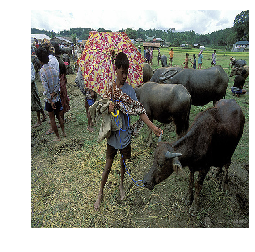

In [267]:
# YOUR CODE HERE

IMAGE_DATA = 'val2014'

# Load models
image_model = load_model(os.path.join(MODEL_PATH,'image_model.h5'))
caption_model = load_model(os.path.join(MODEL_PATH,'caption_model.h5'))

# Load reps
caption_representations = np.load('caption-rep.npy')
image_representations = np.load('image-rep.npy')

# choose one image_id from validation set
# use this id to get filepath of image
img_id = 0
original_caption = val_caps[val_caption_ids[img_id]].capitalize()
filepath_image = find_image_url(find_image_id(caption=original_caption))

# display original caption
print(original_caption)

# DO NOT CHANGE BELOW CODE
img = image.load_img(os.path.join(IMAGE_DATA,filepath_image), target_size=(224,224))
plt.imshow(img)
plt.axis("off")
plt.show()

In [0]:
# function to retrieve caption, given an image query

def get_caption(image_filename, n=10):   
    
    # YOUR CODE HERE
    # Get image features for the given url
    original_caption = find_image_caption(find_image_id(url=image_filename))
    counter = 0
    for i in val_data['caps']:
        i = str(i, 'utf-8')
        i = i.capitalize()
        if i == original_caption:
            break
            #return counter
        else:
            counter = counter + 1
    
    feature = val_data['ims'][[floor(counter/5)]]
    
    # Gen image rep for the image
    image_rep = image_model.predict(feature)
    # Get scores
    scores = np.dot(caption_representations, image_rep.T).flatten()
    # Get indices of n best captions
    indices = np.argpartition(scores, -n)[-n:]
    indices = indices[np.argsort(scores[indices])]
    # Print them
    for i in [int(x) for x in reversed(indices)]:
        print(scores[i], val_data['caps'][i])

In [269]:
# DO NOT CHANGE BELOW CODE
get_caption(filepath_image)

1.4885776 b'the puppy has an orange tie on his neck'
1.2773349 b'a horse stops for a rest before it continues to pull a street car'
1.1968156 b'an old black and white photo of people posing for a picture'
1.1894871 b'the plane is sitting on the runway at the airport'
1.1881937 b'a woman riding a horse in equestrian clothing'
1.1761245 b'a boy kneeling down by his skateboard and holding up his arm cast'
1.1759088 b'a stuffed bear and some books in a room'
1.1717112 b'a woman standing outside of a brick building'
1.1551716 b'a man standing next to a little girl riding a horse'
1.1483365 b'a pole that has two street names on it'


Briefly discuss the result. Why or how it works, and why do you think it does not work at some point.

#### Answer:

The accuracy of the model is quite low, only about 53%. Which means that the results from this will not be very good.

Some of the returned captions are related to the original image and caption. A number of the returned captions have to do with animals (puppy, horse, stuffed bear) are found in the returned caption number 1, 2, 5, 7, and 9, or captions having a semantic similarity with children (boy, little girl) are found in caption 6, and 9. 

### 8. Image Retrieval

In [0]:
# given text query, display retrieved image, similarity score, and its original caption 

def search_image(text_caption, n=10):
     
    # YOUR CODE HERE
    
    # Still have to do:
    # transform raw text caption (text_caption) into integer sequences of fixed maximum length (caption_int_sequence)
    caption_int_seq = np.zeros(50, dtype=int)
    # Provide the caption_int_seq in a workable type/shape for predict (1, 50)
    caption_int_seq = np.reshape(caption_int_seq, (1, 50))
    
    # Gen caption rep for the image
    caption_rep = caption_model.predict(caption_int_seq)
    # Get scores
    scores = np.dot(image_representations, caption_rep.T).flatten()
    # Get indices of n best captions
    indices = np.argpartition(scores, -n)[-n:]
    indices = indices[np.argsort(scores[indices])]
    #Print them
    for i in [int(x) for x in reversed(indices)]:
        # Get retrieved image, and its original caption
        original_caption = val_caps[val_caption_ids[i]].capitalize()
        filepath_image = find_image_url(find_image_id(caption=original_caption))
        # Print the score, and the original caption
        print(scores[i], original_caption)
        # Show the image
        img = image.load_img(os.path.join(IMAGE_DATA,filepath_image), target_size=(224,224))
        _ = plt.imshow(img)
        _ = plt.axis("off")
        _ = plt.show()

Consider to use the following settings for image retrieval task.

* use real caption that is available in validation set as a query.
* use part of caption as query. For instance, instead of use the whole text sentence of the
caption, you may consider to use key phrase or combination of words that is included in
corresponding caption.

0.11107457 A corner bathtub in a very clean bathroom


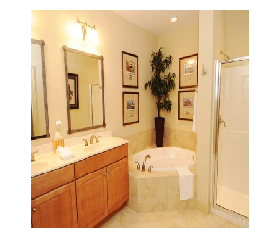

0.09646579 A bed and dresser sitting in a room by a window


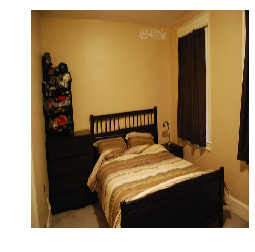

0.09328006 An empty kitchen of a house during the day


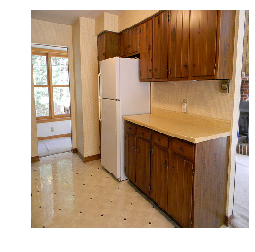

0.09326028 A living room has a beige couch and carpet


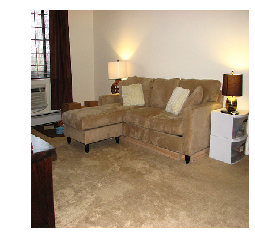

0.09200834 A bathroom with a toilet sitting next to a sink


TypeError: ignored

In [281]:
# Example of text query 
# text = 'two giraffes standing near trees'

# YOUR QUERY-1
# Still to do:
# Find a random int/caption
cap_id = 0
text1 = val_caps[cap_id]
# Note that the current images are not real results

# DO NOT CHANGE BELOW CODE
search_image(text1)

0.11107457 A corner bathtub in a very clean bathroom


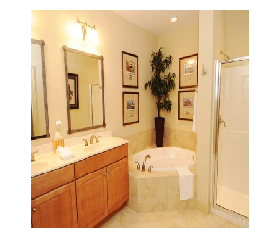

0.09646579 A bed and dresser sitting in a room by a window


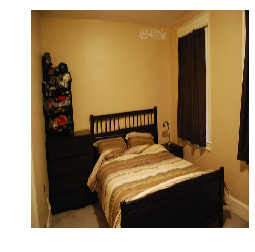

0.09328006 An empty kitchen of a house during the day


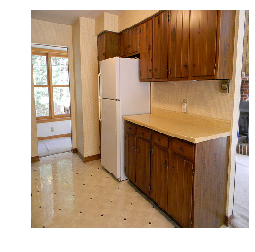

0.09326028 A living room has a beige couch and carpet


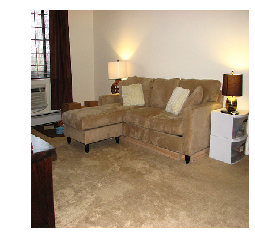

0.09200834 A bathroom with a toilet sitting next to a sink


TypeError: ignored

In [282]:
# YOUR QUERY-2
text2 = 'Todo: Inset some keywords here'
#Note, not real results


# DO NOT CHANGE BELOW CODE
search_image(text2)

Briefly discuss the result. Why or how it works, and why do you think it does not work at some point.

#### Answer:

Unfortuantly, we didn't manage to finish this part. Similar performance is expected as for caption retrieval.